# Анализ объявлений о продаже квартир в СПб

Имеются данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры от которых зависит стоимость квартир. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Инструкция-по-выполнению-проекта" data-toc-modified-id="Инструкция-по-выполнению-проекта-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Инструкция по выполнению проекта</a></span></li></ul></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Считывание-и-просмотр-данных" data-toc-modified-id="Считывание-и-просмотр-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Считывание и просмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-и-удалению-дубликатов" data-toc-modified-id="Поиск-и-удалению-дубликатов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Поиск и удалению дубликатов</a></span></li><li><span><a href="#Просмотр-количества-пропущенных-значений" data-toc-modified-id="Просмотр-количества-пропущенных-значений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Просмотр количества пропущенных значений</a></span></li><li><span><a href="#Столбец-balcony" data-toc-modified-id="Столбец-balcony-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Столбец balcony</a></span></li><li><span><a href="#Столбец-ceiling_height" data-toc-modified-id="Столбец-ceiling_height-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Столбец ceiling_height</a></span></li><li><span><a href="#Столбцы-living_area,-kitchen_area-и-total_area" data-toc-modified-id="Столбцы-living_area,-kitchen_area-и-total_area-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Столбцы living_area, kitchen_area и total_area</a></span></li><li><span><a href="#Столбец-is_apartment" data-toc-modified-id="Столбец-is_apartment-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Столбец is_apartment</a></span></li><li><span><a href="#Столбцы-floor-и-floors_total" data-toc-modified-id="Столбцы-floor-и-floors_total-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Столбцы floor и floors_total</a></span></li><li><span><a href="#Столбец-cityCenters_nearest" data-toc-modified-id="Столбец-cityCenters_nearest-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Столбец cityCenters_nearest</a></span></li><li><span><a href="#Столбец-locality_name" data-toc-modified-id="Столбец-locality_name-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Столбец locality_name</a></span></li><li><span><a href="#Столбец-days_exposition" data-toc-modified-id="Столбец-days_exposition-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Столбец days_exposition</a></span><ul class="toc-item"><li><span><a href="#Столбцы-date,-day_of_week,-month,-year" data-toc-modified-id="Столбцы-date,-day_of_week,-month,-year-4.10.1"><span class="toc-item-num">4.10.1&nbsp;&nbsp;</span>Столбцы date, day_of_week, month, year</a></span></li><li><span><a href="#Пустые-значения-в-столбце-days_exposition-по-годам" data-toc-modified-id="Пустые-значения-в-столбце-days_exposition-по-годам-4.10.2"><span class="toc-item-num">4.10.2&nbsp;&nbsp;</span>Пустые значения в столбце days_exposition по годам</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Добавление-дополнительных-столбцов-в-таблицу" data-toc-modified-id="Добавление-дополнительных-столбцов-в-таблицу-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Добавление дополнительных столбцов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Столбец-price_square_meter-стоимость-за-квадратный-метр" data-toc-modified-id="Столбец-price_square_meter-стоимость-за-квадратный-метр-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Столбец price_square_meter стоимость за квадратный метр</a></span></li><li><span><a href="#Столбец-floor_category-с-значениями-первый,-последний,-другой." data-toc-modified-id="Столбец-floor_category-с-значениями-первый,-последний,-другой.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Столбец floor_category с значениями первый, последний, другой.</a></span></li><li><span><a href="#Столбец-ratio_area_living_to_total-отношение-жилой-площади-к-общей." data-toc-modified-id="Столбец-ratio_area_living_to_total-отношение-жилой-площади-к-общей.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Столбец ratio_area_living_to_total отношение жилой площади к общей.</a></span></li><li><span><a href="#Столбец-ratio_area_kitchen_to_total--отношение-площади-кухни-к-общей" data-toc-modified-id="Столбец-ratio_area_kitchen_to_total--отношение-площади-кухни-к-общей-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Столбец ratio_area_kitchen_to_total  отношение площади кухни к общей</a></span></li><li><span><a href="#Столбец-city_centers_nearest_km-расстояние-до-центра-в-км" data-toc-modified-id="Столбец-city_centers_nearest_km-расстояние-до-центра-в-км-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Столбец city_centers_nearest_km расстояние до центра в км</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров,-удаление-редких-и-выбивающихся-значений." data-toc-modified-id="Изучение-параметров,-удаление-редких-и-выбивающихся-значений.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Изучение параметров, удаление редких и выбивающихся значений.</a></span><ul class="toc-item"><li><span><a href="#Столбец-rooms-число-комнат" data-toc-modified-id="Столбец-rooms-число-комнат-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Столбец rooms число комнат</a></span></li><li><span><a href="#Столбец-total_area-общая-площадь" data-toc-modified-id="Столбец-total_area-общая-площадь-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Столбец total_area общая площадь</a></span></li><li><span><a href="#Столбец-last_price-цена" data-toc-modified-id="Столбец-last_price-цена-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Столбец last_price цена</a></span></li><li><span><a href="#Цена-за-квадратный-метр" data-toc-modified-id="Цена-за-квадратный-метр-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Цена за квадратный метр</a></span></li><li><span><a href="#Столбец-ceiling_height-высота-потолков" data-toc-modified-id="Столбец-ceiling_height-высота-потолков-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>Столбец ceiling_height высота потолков</a></span></li><li><span><a href="#Столбец-days_exposition-длительность-продажи-квартир" data-toc-modified-id="Столбец-days_exposition-длительность-продажи-квартир-6.1.6"><span class="toc-item-num">6.1.6&nbsp;&nbsp;</span>Столбец days_exposition длительность продажи квартир</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6.1.7"><span class="toc-item-num">6.1.7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Зависимость-цен-квартир-от-различных-параметров" data-toc-modified-id="Зависимость-цен-квартир-от-различных-параметров-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Зависимость цен квартир от различных параметров</a></span><ul class="toc-item"><li><span><a href="#Цена-от-площади" data-toc-modified-id="Цена-от-площади-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Цена от площади</a></span></li><li><span><a href="#Цена-от-количества-комнат" data-toc-modified-id="Цена-от-количества-комнат-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Цена от количества комнат</a></span></li><li><span><a href="#Цена-от-этажа-первый,-последний,-другой" data-toc-modified-id="Цена-от-этажа-первый,-последний,-другой-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Цена от этажа первый, последний, другой</a></span></li><li><span><a href="#Цена-от-удаленности-от-центра" data-toc-modified-id="Цена-от-удаленности-от-центра-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Цена от удаленности от центра</a></span></li><li><span><a href="#Цена-от-дня-недели" data-toc-modified-id="Цена-от-дня-недели-6.2.5"><span class="toc-item-num">6.2.5&nbsp;&nbsp;</span>Цена от дня недели</a></span></li><li><span><a href="#Цена-от-месяца" data-toc-modified-id="Цена-от-месяца-6.2.6"><span class="toc-item-num">6.2.6&nbsp;&nbsp;</span>Цена от месяца</a></span></li><li><span><a href="#Цена-от-года" data-toc-modified-id="Цена-от-года-6.2.7"><span class="toc-item-num">6.2.7&nbsp;&nbsp;</span>Цена от года</a></span></li><li><span><a href="#Цена-квадратного-метра-жилья-от-населённого-пункта" data-toc-modified-id="Цена-квадратного-метра-жилья-от-населённого-пункта-6.2.8"><span class="toc-item-num">6.2.8&nbsp;&nbsp;</span>Цена квадратного метра жилья от населённого пункта</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6.2.9"><span class="toc-item-num">6.2.9&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Квартиры-в-центре-Санкт-Петербурга-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Квартиры в центре Санкт-Петербурга</a></span><ul class="toc-item"><li><span><a href="#Предисловие" data-toc-modified-id="Предисловие-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Предисловие</a></span></li><li><span><a href="#Выделение-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Выделение-квартир-в-центре-Санкт-Петербурга-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Выделение квартир в центре Санкт-Петербурга</a></span></li><li><span><a href="#Столбец-total_area-площадь" data-toc-modified-id="Столбец-total_area-площадь-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Столбец total_area площадь</a></span></li><li><span><a href="#Столбец-last_price-цена" data-toc-modified-id="Столбец-last_price-цена-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Столбец last_price цена</a></span></li><li><span><a href="#Столбец-rooms-число-комнат" data-toc-modified-id="Столбец-rooms-число-комнат-6.3.5"><span class="toc-item-num">6.3.5&nbsp;&nbsp;</span>Столбец rooms число комнат</a></span></li><li><span><a href="#Столбец-ceiling_height" data-toc-modified-id="Столбец-ceiling_height-6.3.6"><span class="toc-item-num">6.3.6&nbsp;&nbsp;</span>Столбец ceiling_height</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.3.7"><span class="toc-item-num">6.3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Введение

### Описание данных

+ airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
+ balcony — число балконов
+ ceiling_height — высота потолков (м)
+ cityCenters_nearest — расстояние до центра города (м)
+ days_exposition — сколько дней было размещено объявление (от публикации до снятия)
+ first_day_exposition — дата публикации
+ floor — этаж
+ floors_total — всего этажей в доме
+ is_apartment — апартаменты (булев тип)
+ kitchen_area — площадь кухни в квадратных метрах (м²)
+ last_price — цена на момент снятия с публикации
+ living_area — жилая площадь в квадратных метрах (м²)
+ locality_name — название населённого пункта
+ open_plan — свободная планировка (булев тип)
+ parks_around3000 — число парков в радиусе 3 км
+ parks_nearest — расстояние до ближайшего парка (м)
+ ponds_around3000 — число водоёмов в радиусе 3 км
+ ponds_nearest — расстояние до ближайшего водоёма (м)
+ rooms — число комнат
+ studio — квартира-студия (булев тип)
+ total_area — площадь квартиры в квадратных метрах (м²)
+ total_images — число фотографий квартиры в объявлении

### Инструкция по выполнению проекта

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Предобработка данных

1.	Определите и изучите пропущенные значения:

+ Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
+ Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.
+ Укажите причины, которые могли привести к пропускам в данных.

2.	Приведите данные к нужным типам:

+ Поясните, в каких столбцах нужно изменить тип данных и почему.

Шаг 3. Посчитайте и добавьте в таблицу

+ цену квадратного метра;
+ день недели, месяц и год публикации объявления;
+ этаж квартиры; варианты — первый, последний, другой;
+ соотношение жилой и общей площади, а также отношение площади кухни к общей.

Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

+ Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
+ Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
+ Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
+ Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
+ Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
+ Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
+ Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

Шаг 5. Напишите общий вывод

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
# Отключение предупреждений.
warnings.filterwarnings('ignore')

## Считывание и просмотр данных

In [3]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

In [4]:
pd.set_option('display.max_columns', None) # метод включающий отображение всех колонок
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# копирование данных для испльзования данных без удалений
data_full = data.copy()

In [6]:
# сохранение количества строк в базе
data_len = len(data)
print(data_len)

23699


## Предобработка данных

### Поиск и удалению дубликатов 

In [7]:
# проверка дубликатов
data.duplicated().sum()

0

Явных дубликатов в данных не обнаружено.

### Просмотр количества пропущенных значений

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

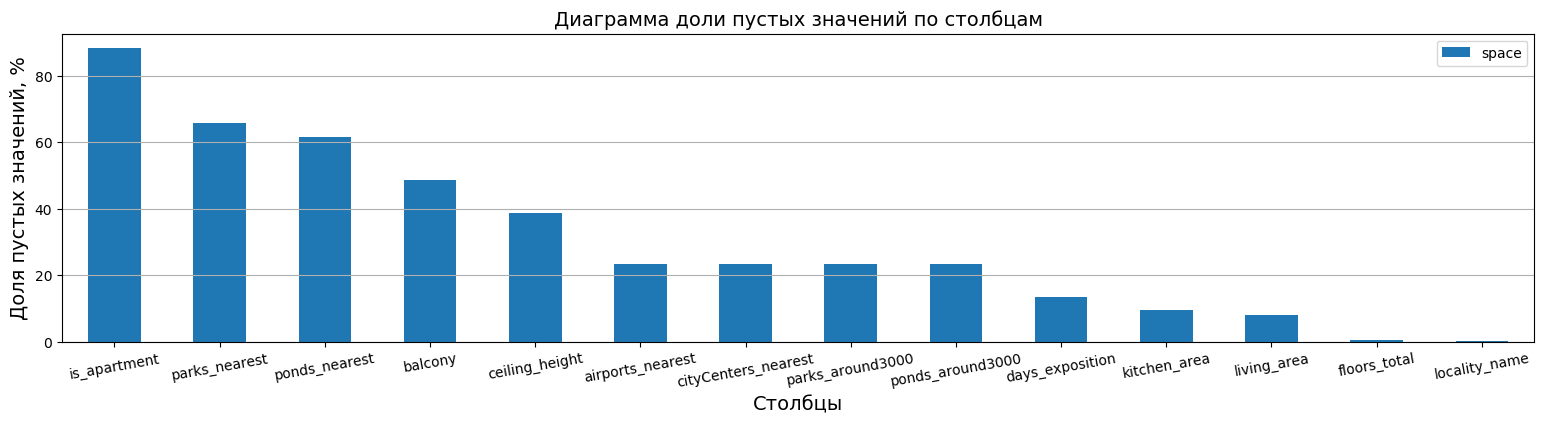

In [9]:
(
    (data.isna().mean()*100)
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = False)
    .plot(kind= 'bar', figsize=(19,4), rot = 10)
)
plt.grid(axis='y')
plt.title('Диаграмма доли пустых значений по столбцам', fontsize=14)
plt.xlabel('Столбцы', fontsize=14)
plt.ylabel('Доля пустых значений, %', fontsize=14);

Пропущенные значения обнаружены в 14 столбцах. Для целей данного исследования нужны 9 столбцов ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, cityCenters_nearest, days_exposition.
Дальнейшие предобработка данных будет проведена для этих 9 столбцов

### Столбец balcony

В столбце balcony 11519 незаполненных значений. Посмотрим уникальные значения столбца balcony и их количество.

In [10]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

 Можно предположить, что пользователи которые не имеют балконов, не заполняли это поле значением ноль, и поэтому это поле осталось не заполненным.Таким образом их можно заполнить значениями 0. 

In [11]:
# Заполнение пропусков в столбце balcony значением 0
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Количество балконов это целочисленная переменная, а ее тип нецелочисленный float, поэтому изменим его на int. 

In [12]:
# Изменение типа данных в столбце balcony с float64 на int64
data['balcony'] = data['balcony'].astype(int)
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

### Столбец ceiling_height

In [13]:
print('В столбце ceiling_height', data['ceiling_height'].isna().sum(), 'пропусков')
print('Что составляет', round(data['ceiling_height'].isna().mean() * 100, 1))

В столбце ceiling_height 9195 пропусков
Что составляет 38.8


Такое большое количество пропусков скорее всего связано с тем, что пользователи не заполняют это поле.
Для решения вопроса о заполнении пропусков, посмотрим статистическое описание данных и гистограмму распределения высоты потолков.

In [14]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

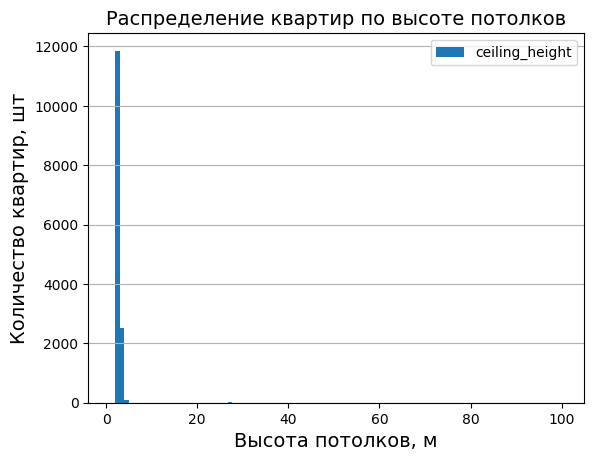

In [15]:
data.plot(kind='hist', y='ceiling_height', bins=100)
plt.grid(axis='y')
plt.title('Распределение квартир по высоте потолков', fontsize=14)
plt.xlabel('Высота потолков, м', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Минимальное значение высоты потолков 1 м, максимальное 100 м, среднее значение 2.77 м. Максимальное и минимальное значение имеют аномальные значения

Для определения отсечения высоты потолков снизу, посмотрим первые 10 значений распределения высоты потолков

In [16]:
data['ceiling_height'].value_counts().reset_index().sort_values(by='index').head(10)

,index,ceiling_height
147,1.00,1
175,1.20,1
154,1.75,1
55,2.00,11
143,2.20,1
155,2.25,1
98,2.30,4
162,2.34,1
37,2.40,23
46,2.45,15


В качестве нижней границы отсечения возьмём высоту меньше 2 метров.

Для определения отсечения высоты потолков сверху, посмотрим последние 35 строк распределения высоты потолков.

In [17]:
data['ceiling_height'].value_counts().reset_index().sort_values(by='index').tail(35)

,index,ceiling_height
104,4.10,3
164,4.14,1
176,4.15,1
126,4.19,2
61,4.20,10
132,4.25,1
165,4.30,1
166,4.37,1
117,4.40,3
124,4.45,2


В качестве верхней границы высоты потолков возьмём высоту 4,5 метра.

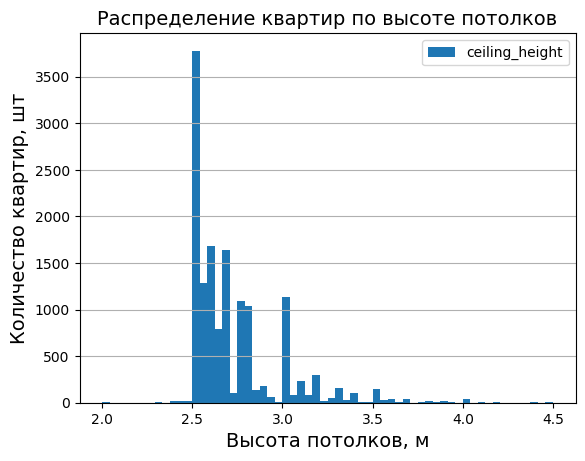

In [18]:
data.loc[(2 <= data['ceiling_height'])
         & (data['ceiling_height'] <= 4.5) 
         | (data['ceiling_height'].isna())] \
         .plot(kind='hist', y='ceiling_height', bins=60)
plt.grid(axis='y')
plt.title('Распределение квартир по высоте потолков', fontsize=14)
plt.xlabel('Высота потолков, м', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Количество пустых значений составляет 63%, это довольно большая доля. Если заменить пустые значения на среднее или медиану, то это исказит распределение по высоте потолков. Поэтому для дальнейшего исследования не будем заполнять пустые значения и проводить исследование с имеющимися данными по высоте потолков.

Удалим строки с значением высоты менее 2 м и более 4.5 м.

In [19]:
len(data)

23699

In [20]:
data = data.loc[(2 <= data['ceiling_height'])
         & (data['ceiling_height'] <= 4.5) 
         | (data['ceiling_height'].isna())]

In [21]:
len(data)

23654

### Столбцы living_area, kitchen_area и total_area

В столбце living_area 1903 не заполненых значения, в столбце kitchen_area 2278 не заполненных значения, в столбце total_area все строки заполнены. Посмотрим имеются ли в данных строки в которых
не заполнены значения в столбце living_area и при этом заполнены в столбце kitchen_area.

In [22]:
# булево выражение living_area = NaN, kitchen_area != NaN
living_area_NaN_kitchen_area_value = data['living_area'].isna() & (~(data['kitchen_area'].isna()))
# проверка выполнения условий отбора
(
  display(data[living_area_NaN_kitchen_area_value]
  [['living_area', 'kitchen_area', 'total_area']])
)

,living_area,kitchen_area,total_area
7,NaN,18.90,71.60
116,NaN,18.30,97.20
165,NaN,10.20,60.20
238,NaN,12.40,43.40
360,NaN,10.19,57.84
...,...,...,...
23534,NaN,10.00,39.00
23584,NaN,8.00,66.00
23587,NaN,14.00,88.00
23588,NaN,10.00,69.00


Обнаружили 439 таких строк.
Теперь можно заполнить пустые значения в столбце living_area расчетными значениями по формуле total_area*mean((living_area+kitchen_area)/total) - kitchen_area.
Где mean(living+kitchen/total) - это средние значения по всем квартирам отношения суммы площади кухни и жилой площади (living_area+kitchen_area) к общей площади total_area.
Для этих расчетов добавим столбец living_area+kitchen_area сумма площади кухни и жилой площади, и столбец living+kitchen/total отношение суммы жилой с кухней к общей площади. Также рассчитаем среднее значения living+kitchen/total.

In [23]:
data['living+kitchen_area'] = data['living_area'] + data['kitchen_area']
data['living+kitchen/total'] = data['living+kitchen_area'] / data['total_area']
display(data[['living_area', 'kitchen_area', 'living+kitchen_area', 'total_area', 'living+kitchen/total']])

,living_area,kitchen_area,living+kitchen_area,total_area,living+kitchen/total
0,51.0,25.00,76.00,108.00,0.703704
1,18.6,11.00,29.60,40.40,0.732673
2,34.3,8.30,42.60,56.00,0.760714
3,NaN,NaN,NaN,159.00,NaN
4,32.0,41.00,73.00,100.00,0.730000
...,...,...,...,...,...
23694,73.3,13.83,87.13,133.81,0.651147
23695,38.0,8.50,46.50,59.00,0.788136
23696,29.7,NaN,NaN,56.70,NaN
23697,NaN,23.30,NaN,76.75,NaN


In [24]:
# Расчёт среднего значения living+kitchen/total по не пустым значениям
mean_living_kitchen_total = data['living+kitchen/total'].mean()
print(mean_living_kitchen_total)

0.7494387986255471


In [25]:
# Условие отбора строк в которых living_area = NaN пусто,а kitchen_area - не пусто
living_NaN_kitchen_value = data['living_area'].isna() & (~data['kitchen_area'].isna())
# проверка работоспособности условия
data[living_NaN_kitchen_value][['living_area', 'kitchen_area']]

,living_area,kitchen_area
7,NaN,18.90
116,NaN,18.30
165,NaN,10.20
238,NaN,12.40
360,NaN,10.19
...,...,...
23534,NaN,10.00
23584,NaN,8.00
23587,NaN,14.00
23588,NaN,10.00


In [26]:
# Подсчет пустых значений в столбцах
data.loc[:,['living_area', 'kitchen_area']].isna().sum()

living_area     1900
kitchen_area    2268
dtype: int64

In [27]:
# Присваивание пустым ячейкам living_area расчетного значения total_area * mean_living_kitchen_total - kitchen_area

data.loc[living_NaN_kitchen_value, 'living_area'] = \
   (data[living_NaN_kitchen_value]['total_area'] 
    * mean_living_kitchen_total) \
    - data[living_NaN_kitchen_value]['kitchen_area']  

Проверка, что замена произошла.

In [28]:
data.loc[:,['living_area', 'kitchen_area']].isna().sum()

living_area     1461
kitchen_area    2268
dtype: int64

Проверка показала, что замена значений произошла.

Создание условия для отбора пустых значений в столбце kitchen_area и не пустых значений в столбце living_area

In [29]:
# условие отбора строк kitchen_area - NaN, living_area не пустые
living_area_value_kitchen_area_NaN = (~(data['living_area'].isna())) & data['kitchen_area'].isna()
# проверка работоспособности кода
(
  display(data[living_area_value_kitchen_area_NaN]
  [['living_area', 'kitchen_area', 'total_area']])
)

,living_area,kitchen_area,total_area
144,15.5,NaN,27.0
155,183.0,NaN,317.0
178,89.4,NaN,153.0
188,18.5,NaN,38.5
199,17.0,NaN,37.4
...,...,...,...
23592,18.0,NaN,29.0
23604,27.0,NaN,44.3
23637,17.0,NaN,26.0
23655,19.6,NaN,40.5


Таких строк 807. Заполнение пустых значений в столбце kitchen_area значениями рассчитанными по формуле
Значения общей площади total_area умноженное на среднее mean_living_kitchen_total и вычитание значения жилой плащади living_area для 

In [30]:
data.loc[:,['living_area', 'kitchen_area']].isna().sum()

living_area     1461
kitchen_area    2268
dtype: int64

In [31]:
data.loc[living_area_value_kitchen_area_NaN, 'kitchen_area'] \
    = (data[living_area_value_kitchen_area_NaN]['total_area'] \
       * mean_living_kitchen_total) \
       - data[living_area_value_kitchen_area_NaN]['living_area']  

Проверка, что замена произошла.

In [32]:
data.loc[:,['living_area', 'kitchen_area']].isna().sum()

living_area     1461
kitchen_area    1461
dtype: int64

Замена пустых значений расчетными произошла.

### Столбец is_apartment

В столбце is_apartment 20924 пустых значения. Посмотрим уникальные значения этого столбца и их количество.

In [33]:
data['is_apartment'].value_counts()

False    2714
True       47
Name: is_apartment, dtype: int64

Столбец is_apartment имеет всего 50 значений True, т.е. всего 50 аппартаментов в объявлениях. Это значительно меньше, чем 2750 значений False. Поэтому скорее всего пустые значения связаны с тем, что пользователи не заполняли это значение. Заполним пустые ячейки значениями False.

In [34]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23607
True        47
Name: is_apartment, dtype: int64

### Столбцы floor и floors_total

In [35]:
print('Столбец floors_total имеет', data['floors_total'].isna().sum(), 'пустных значений')

Столбец floors_total имеет 86 пустных значений


Столбец floor не имеет пустых значений.

Посмотрим уникальные значения и их количество в столбце floor.

In [36]:
data['floor'].value_counts().reset_index().sort_values(by='index')

,index,floor
2,1,2913
0,2,3357
1,3,3067
3,4,2802
4,5,2612
5,6,1304
6,7,1214
7,8,1083
8,9,1051
9,10,687


Каких-либо аномальных значений не видно, вполне может быть небольшое количество высотных домов.

Посмотрим в столбце floors_total уникальные значения и их количество.

In [37]:
data['floors_total'].value_counts().reset_index().sort_values(by='index')

,index,floors_total
26,1.0,25
15,2.0,380
9,3.0,664
4,4.0,1198
0,5.0,5772
7,6.0,912
10,7.0,590
14,8.0,389
1,9.0,3759
5,10.0,1173


Каких-либо аномальных значений нет.

Посмотрим значения столбцов floor при пустых значениях столбца floors_total

In [38]:
data[data['floors_total'].isna()][['floor', 'floors_total']]

,floor,floors_total
186,4,NaN
237,1,NaN
457,12,NaN
671,8,NaN
1757,9,NaN
...,...,...
22542,3,NaN
22656,20,NaN
22808,6,NaN
23590,18,NaN


Пустые значения в колонке floors_total возможно, возникли из-за того, что пользователи заполняли свой этаж, который был последним и не заполняли поле floor_total. Для дальнейшей работы заменим пустые значения в колонке floors_total значениями из колонки floor.

In [39]:
# Заполнение пустых значений в колонке floors_total значениями из колонки floor
data['floors_total'] = data['floors_total'].fillna(data['floor'])
# проверка, что пустые значения заполнились
data['floors_total'].isna().sum()

0

In [40]:
# Изменение типа данных столбца floor_total на int
data['floors_total'] = data['floors_total'].astype(int)
data['floors_total'].value_counts().reset_index().sort_values(by='index')

,index,floors_total
26,1,28
15,2,382
9,3,668
4,4,1208
0,5,5776
7,6,921
10,7,594
14,8,397
1,9,3764
5,10,1176


### Столбец cityCenters_nearest

Переименование столбца cityCenters_nearest

In [41]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

Количество пустых значений в столбце city_centers_nearest равно 5519. Возможно пустые значения в этом столбце связаны с тем, что для квартир не в Санкт-Петербурге, такое значение не рассчитывалось. Проверим наше предположение, и посчитаем количество пустых значений для квартир в Санкт-Петербурге.

In [42]:
data[data['locality_name'] == 'Санкт-Петербург']['city_centers_nearest'].isna().sum()

61

Для квартир в Санкт-Петербурге незаполненных значений всего 61. Это небольшое количество. Оставим его незаполненным.

### Столбец locality_name

Столбец locality_name имеет 49 пустых значений. Это небольшое количество. Для дальнейшего анализа заполним их значением 'не заполнено'

In [43]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

### Столбец days_exposition

Расчитаем количество пропущенных значений в столбце days_exposition

In [44]:
data['days_exposition'].isna().sum()

3172

Столбец days_exposition имеет 3181 незаполненное значение. Посчитаем долю пропущенных значений.

In [45]:
data['days_exposition'].isna().sum() / data['days_exposition'].count()

0.15523907404688495

Доля пропущенных значений составляет 15,5%. Это достаточно большое количество, при этом это поле автоматически создаётся с сервисом. Поэтому нужно разобратся в чем причина такого значительного количестве пустых значений.
Для этого посмотрим распределение пустых значений по годам. В связи с этим ниже будут созданы столбцы date, day_of_week, month, year

#### Столбцы date, day_of_week, month, year

In [46]:
data['date'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['day_of_week'] = pd.DatetimeIndex(data['date']).dayofweek
data['month'] = pd.DatetimeIndex(data['date']).month
data['year'] = pd.DatetimeIndex(data['date']).year
display(data[['first_day_exposition', 'date', 'day_of_week', 'month', 'year']])

,first_day_exposition,date,day_of_week,month,year
0,2019-03-07T00:00:00,2019-03-07,3,3,2019
1,2018-12-04T00:00:00,2018-12-04,1,12,2018
2,2015-08-20T00:00:00,2015-08-20,3,8,2015
3,2015-07-24T00:00:00,2015-07-24,4,7,2015
4,2018-06-19T00:00:00,2018-06-19,1,6,2018
...,...,...,...,...,...
23694,2017-03-21T00:00:00,2017-03-21,1,3,2017
23695,2018-01-15T00:00:00,2018-01-15,0,1,2018
23696,2018-02-11T00:00:00,2018-02-11,6,2,2018
23697,2017-03-28T00:00:00,2017-03-28,1,3,2017


#### Пустые значения в столбце days_exposition по годам

Для анализа пустых значений посмотрим их распределение по годам. 

In [47]:
# Построение таблицы в количеством пустых значений по годам
days_exposition_nan = data[data['days_exposition'].isna()]['year'].value_counts().reset_index().sort_values(by='index')
display(days_exposition_nan)

,index,year
5,2014,18
3,2015,70
4,2016,67
2,2017,269
1,2018,956
0,2019,1792


Расчёт общего количество объявлений по годам.

In [48]:
total_number_ads = data['year'].value_counts().reset_index().sort_values(by='index')
display(total_number_ads)

,index,year
5,2014,136
4,2015,1169
3,2016,2763
1,2017,8168
0,2018,8497
2,2019,2872


Создание обобщенной таблицы со столбцами days_exposition_nan, total_number_ads

In [49]:
table_days_exposition = days_exposition_nan.merge(total_number_ads, on='index')
display(table_days_exposition)

,index,year_x,year_y
0,2014,18,136
1,2015,70,1169
2,2016,67,2763
3,2017,269,8168
4,2018,956,8497
5,2019,1792,2872


Рассчитаем, какую долю от общего количества объявлений занимают объявления с пустыми значениями.

In [50]:
# переименование названий столбцов
table_days_exposition = table_days_exposition.rename(
    columns={
        'index': 'year',
        'year_x' : 'nan',
        'year_y' : 'total'
    }
)
# расчёт доли пустых значений по годам
table_days_exposition['ratio'] = round((table_days_exposition['nan'] / table_days_exposition['total']) * 100)
display(table_days_exposition)

,year,nan,total,ratio
0,2014,18,136,13.0
1,2015,70,1169,6.0
2,2016,67,2763,2.0
3,2017,269,8168,3.0
4,2018,956,8497,11.0
5,2019,1792,2872,62.0


Из полученной таблицы видно, что с 2015 по 2017 год пустых значений было всего несколько процентов, в то время, как в 2014 - 13%, в 2018 уже 11%, а в 2019 - 62%. Исходя из того, что в 2015-17 г доля пустых значений незначительна, то пустные значения означают, что такие объявления были созданы, но не демонстрировались. Доля 13% в 2014 году может объясняется тем, что в начале работы сервиса, было много клиентов, которые его попробовали, но не стали им пользоваться. Также, в этот год было небольшое количество объявлений, что могло дать большую ошибку. Что касается большой доли пустых значений в 2018-19 года, есть предположение, что это связано, с датой обявлений. Посмотрим, даты объявлений за 2019 г.

In [51]:
data.query('year == 2019')['date'].sort_values()

9287    2019-01-01
22876   2019-01-01
17494   2019-01-01
7442    2019-01-01
21291   2019-01-01
           ...    
12208   2019-05-03
13746   2019-05-03
10917   2019-05-03
13993   2019-05-03
14424   2019-05-03
Name: date, Length: 2872, dtype: datetime64[ns]

Из полученных значений можно увидеть, что объявления заканчиваются началом марта. Из этого факта становится понятным, что увеличение доли пустых значений в 2018-19 годах возможно связано с тем, что есть текущие объявления, у которых пока еще нет даты завершения объявления и соответственно нет срока показа объявления. Пустые значения в объявлениях 2014-17 г могут означать, что эти объявления были созданы, но не демонстрировались, т.е. клиенты их создали, но не оплатили показ.
Исходя из этого обследования пустых значений, предлагается удалить строки с пустыми значениями за 2014-17 год, чтобы они не влияли на расчитываемые значения, и не удалять значения за 2018-19 год, так как по значениям 2015-17 года видно, что пустых значений всего несколько процентов и они окажут небольшое влияние на расчитываемые величины.
Обнаруженные пустые значения и их причины лучше обсудить с отделом по работе сервиса, чтобы разобраться в чем причина появления пустых значений.

Удаление пустых значений за 2014-17 года.

In [52]:
len(data)

23605

In [53]:
data['days_exposition'].isna()

0         True
1        False
2        False
3        False
4        False
         ...  
23694     True
23695    False
23696     True
23697    False
23698     True
Name: days_exposition, Length: 23605, dtype: bool

In [54]:
data = data.query('year in [2014, 2015, 2016, 2017] and not days_exposition.isna() or year in [2018, 2019]')

In [55]:
len(data)

23181

### Вывод

Посчитаем общее количество удалённых строк с пустыми значениями.

In [56]:
len(data)

23181

In [57]:
print('Всего было удалено', data_len - len(data), ',что составило', round(100*(data_len - len(data)) / data_len, 1), '%')

Всего было удалено 518 ,что составило 2.2 %


Таким образом, в данном разделе была проведена предобработка данных в 9 столбцах. В 4-х столбцах floors_total, is_apartment, balcony, locality_name были проведены замены на подходящие значения. В 1-ом столбце days_exposition было частичное удаление пустых значений. В 2-х столбцах ceiling_height, city_centers_niarest пустые значения оставлены. В 2-х столбцах living_area, kitchen_area была попытка замены пустых значений расчетными, но технически она не сработала. Прошу проконсультировать по этому вопросу.

При анализе большого количестве пустых значений в столбце days_exposition была выявлена зависимость их количества от года размещения объявления. В последние 2018-19 год количество пустых объявление значительно больше, чем в предыдущие года.
Это требует обращения в отдел по работе сервиса, для выяснения причин появления такого количества пустых значений.

## Добавление дополнительных столбцов в таблицу

### Столбец price_square_meter стоимость за квадратный метр

In [58]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).astype(int) 

In [59]:
data['price_square_meter']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23692     45000
23693     73717
23695     52542
23696     44091
23697    149511
Name: price_square_meter, Length: 23181, dtype: int32

### Столбец floor_category с значениями первый, последний, другой.

In [60]:
# функция категоризации
def floor_category (row):
    if row['floor'] == 1:
        return('первый')
    if row['floor'] == row['floors_total']:
        return('последний')
    else:
        return('другой')

data['floor_category'] = data.apply(floor_category, axis=1)

In [61]:
# проверка работы функции категоризации
display(data[['floor', 'floors_total', 'floor_category']].head(15))

,floor,floors_total,floor_category
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


In [62]:
data['floor_category'].isna().sum()

0

### Столбец ratio_area_living_to_total отношение жилой площади к общей.

In [63]:
data['ratio_area_living_to_total'] = data['living_area'] / data['total_area']
print(data['ratio_area_living_to_total'])

0        0.472222
1        0.460396
2        0.612500
3             NaN
4        0.320000
           ...   
23692    0.583333
23693    0.641026
23695    0.644068
23696    0.523810
23697    0.445856
Name: ratio_area_living_to_total, Length: 23181, dtype: float64


### Столбец ratio_area_kitchen_to_total  отношение площади кухни к общей 

In [64]:
data['ratio_area_kitchen_to_total'] = data['kitchen_area'] / data['total_area']
display(data[['kitchen_area', 'total_area', 'ratio_area_kitchen_to_total']])

,kitchen_area,total_area,ratio_area_kitchen_to_total
0,25.00000,108.00,0.231481
1,11.00000,40.40,0.272277
2,8.30000,56.00,0.148214
3,NaN,159.00,NaN
4,41.00000,100.00,0.410000
...,...,...,...
23692,6.00000,30.00,0.200000
23693,8.00000,62.40,0.128205
23695,8.50000,59.00,0.144068
23696,12.79318,56.70,0.225629


### Столбец city_centers_nearest_km расстояние до центра в км

In [65]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

### Вывод

В данном разделе было дабавлено 5 новых столбцов для использования в дальнейшем исследовании.

## Исследовательский анализ данных

### Изучение параметров, удаление редких и выбивающихся значений.

Изучим значения в столбцах rooms, total_area, last_price, ceiling_height, days_exposition с целью определения редких и выбивающихся значений. Для этого будем пользоваться построением гистограмм и статистическими характеристиками из метода describe.

In [66]:
data_len_4= len(data)
print(data_len_4)

23181


#### Столбец rooms число комнат

Построим гистограмму по количеству комнат.

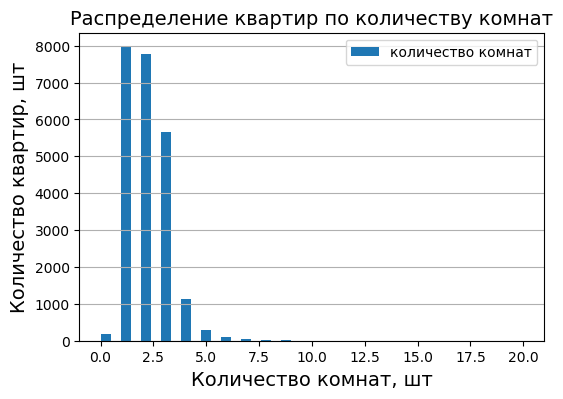

In [67]:
data.plot(kind='hist', y='rooms', bins=40, label='количество комнат', legend=True, xlim=(-1,21), figsize=(6,4))
plt.grid(axis='y')
plt.title('Распределение квартир по количеству комнат', fontsize=14)
plt.xlabel('Количество комнат, шт', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Посмотрим уникальные значения в столбце rooms и их количество.

In [68]:
rooms_value_counts = data['rooms'].value_counts().reset_index().sort_values(by='index')
display(rooms_value_counts)

,index,rooms
5,0,193
0,1,7954
1,2,7780
2,3,5651
3,4,1119
4,5,304
6,6,99
7,7,51
8,8,12
9,9,7


Обращает на себя внимание, что в столбце есть значения 0 комнат в 197 записях, что выглядит странным. Но возможно это особые квартиры студии, которые являются квартирами без перегородок и пользователи сервиса обозначают такие квартиры значением 0. Проверим, сколько записей имеют значение rooms = 0 и значением studio = True.

In [69]:
data.query('rooms == 0 and studio == True')['rooms'].count()

135

Получилось, что 136 записей из 195, с rooms=0 это студии.

Еще возможно, что записи с rooms=0 это апартаменты. Проверим это предположение.

In [70]:
data.query('rooms == 0 and is_apartment == True')['rooms'].count()

0

Аппартаментов с rooms = 0 нет.

Определим границу редких значений для числа комнат. Рассматривая таблицу количество комнат - количество квартир, можно взять границу редких квартир с количеством комнат больше 5. Посчитаем, какую долю составляют такие квартиры. 

In [71]:
rooms_value_counts.query('index > 5')['rooms'].sum() / rooms_value_counts.query('index <= 5')['rooms'].sum()

0.007825746706664928

Получили, что квартир с количеством комнат больше 5 всего 0,8%. Это незначительно количество, поэтому значение rooms больше 5 можно взять за границу для отсечения редких значений.

Из гистограммы видно, что основное количество квартир имеют от 1 до 5 комнат. При этом количество однокомнатных и двухкомнатных квартир почти одинаковое.

Удалим из базы значения больше 5 комнат.

In [72]:
len(data)

23181

In [73]:
data = data.query('rooms <= 5')

In [74]:
len(data)

23001

#### Столбец total_area общая площадь 

Построим гистограмму распределения квартир по общей площади.

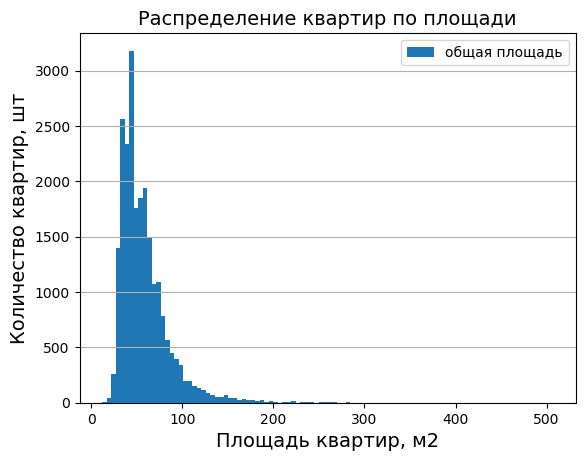

In [75]:
data.plot(kind='hist', y='total_area', bins=100, label='общая площадь', legend=True)
plt.grid(axis='y')
plt.title('Распределение квартир по площади', fontsize=14)
plt.xlabel('Площадь квартир, м2', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Из построенной гистограммы видно, что основное количество квартир приходятся на площадь 30-70 квадратных метров. А квартир более 200 практически нет.
Посмотрим статистические характеристики распределения квартир по площади

In [76]:
total_area_descr = data['total_area'].describe()
display(total_area_descr)

count    23001.000000
mean        58.338601
std         29.405622
min         12.000000
25%         40.000000
50%         51.300000
75%         68.000000
max        507.000000
Name: total_area, dtype: float64

Из полученных значений видно, что распределение имеет большой хвост, максимальное значение составляет 507. Посчитаем чему равно значение Q3 + 1,5 IQR.

In [77]:
# Создание функции расчета границы выброса outlier по формуле Q3 + 1,5IQR из значений метода describe
def outlier (describe):
    outlier = describe['75%'] +(describe['75%'] - describe['25%']) * 1.5
    return outlier

In [78]:
# Расчет значения Q3 + 1,5IQR для total_area
total_area_outlier = outlier(total_area_descr)
print(total_area_outlier)

110.0


Получили значение Q3 + 1,5IQR = 110 кв. м. Возъмем эту величину в качестве порога отсечения и посчитаем долью квартир более 115 кв.м.

In [79]:
# расчёт доли квартир больше 115 кв. м.
print(data[data['total_area'] > total_area_outlier]['total_area'].count() / len(data))

0.04708490935176732


Доля значений за принятым порогом отсечения составляет 4,7 %. Это довольно большая величина. Посмотрим распределение для total_area > total_area_outlier

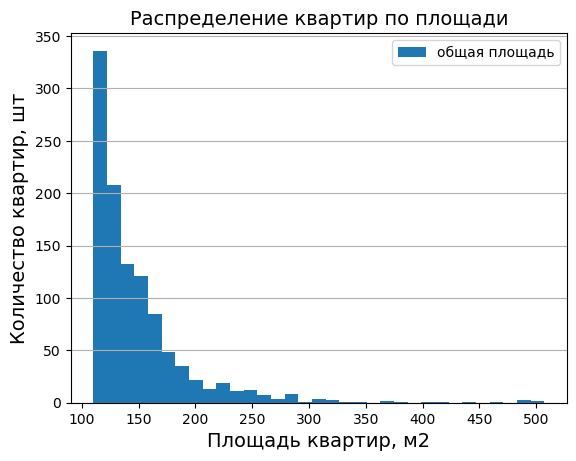

In [80]:
data[data['total_area'] > total_area_outlier].plot(kind='hist', y='total_area', bins=33, label='общая площадь', legend=True)
plt.grid(axis='y')
plt.title('Распределение квартир по площади', fontsize=14)
plt.xlabel('Площадь квартир, м2', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Квартир с площадью более 115 м. кв. остаётся еще достаточно много. На гистограмме, можно увидеть, что очень мало квартир с площадью более 250 м. кв. Попробуем взять это значение в качестве порога отсечения и посчитаем, какую долю составляют квартиры больше этого порога.

In [81]:
# расчёт доли квартир больше 250 кв. м.
print(data[data['total_area'] > 250]['total_area'].count() / len(data))

0.0019999130472588148


Получилось, что квартир более 250 кв. м. всего 0,2% возьмем эту величину в качестве порога отсечения.

In [82]:
len(data)

23001

In [83]:
data[data['total_area'] > 250]['total_area'].count()

46

In [84]:
data=data.query('total_area <= 250')

In [85]:
len(data)

22955

Построим гистограмму после удаления выбросов и редких значений.

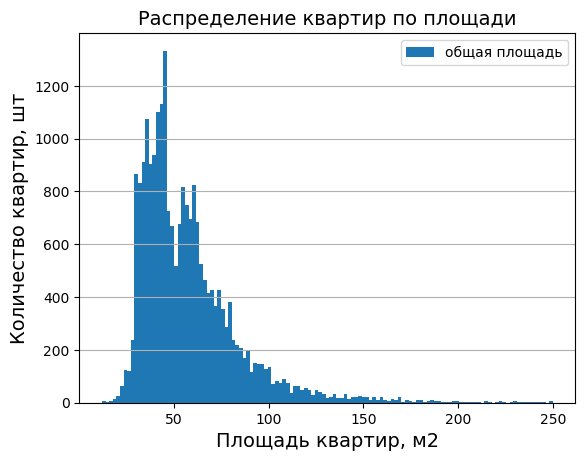

In [86]:
data.plot(kind='hist', y='total_area', bins=125, label='общая площадь', legend=True)
plt.grid(axis='y')
plt.title('Распределение квартир по площади', fontsize=14)
plt.xlabel('Площадь квартир, м2', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

#### Столбец last_price цена

Построим гистограмму распределения цены квартир и вычислим её статистические характеристики

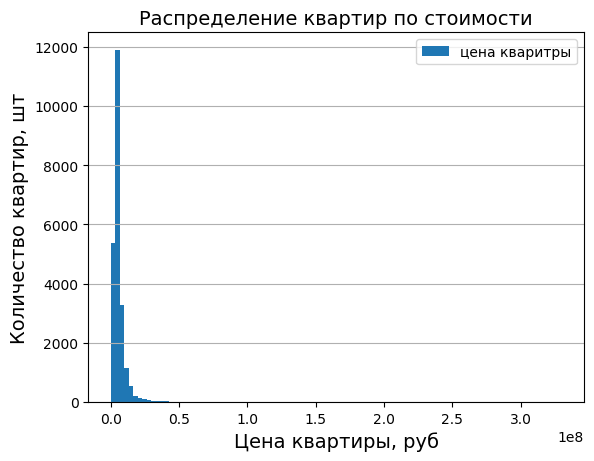

In [87]:
data.plot(kind='hist', y='last_price', bins=100, label='цена кваритры', legend=True)
plt.grid(axis='y')
plt.title('Распределение квартир по стоимости', fontsize=14)
plt.xlabel('Цена квартиры, руб', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

In [88]:
last_price_descr = data['last_price'].describe()
print(last_price_descr)

count    2.295500e+04
mean     5.999641e+06
std      6.592251e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      3.300000e+08
Name: last_price, dtype: float64


Из данных видно, что максимальное значение цены на 2 порядка больше среднего и медианы. Посчитаем значение Q3 + 1,5IQR

In [89]:
# Расчёт выброса outlier
last_price_outlier = outlier(last_price_descr)
print(last_price_outlier)

11400000.0


Получилось значение Q3 + 1.5IQR 11 млн. 900 тыс. рублей. Возьмем эту величину в качестве порога и посчитаем долю таких квартир.

In [90]:
print(data[data['last_price'] > last_price_outlier]['last_price'].count() / len(data))

0.07911130472663908


Доля таких квартир составила 8,5 % это довольно большая величина. Это связано с тем, что гистограмма несимметрична и вытянута в право на графике, поэтому величина Q3+1.5IQR отсекает большое количество значений. Построим гистограмму для площади квартир более 11 млн 900 тыс рубл. и менее 50 млн руб, так как больше это величины квартир почти нет.

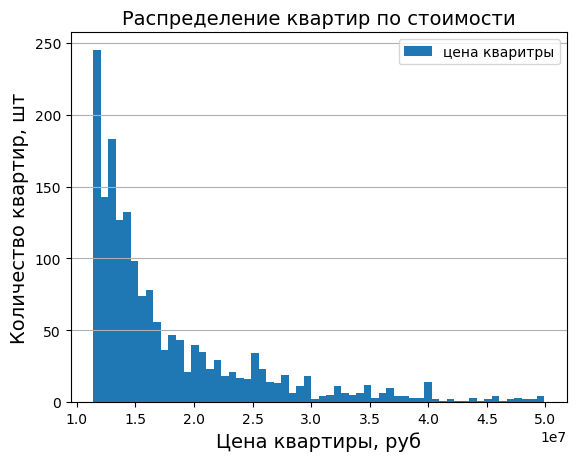

In [91]:
# Гистограмма цены для значений меньшей outlier
data.query('@last_price_outlier < last_price < 50000000') \
    .plot(kind='hist', y='last_price', bins=60, label='цена кваритры', legend=True)
plt.grid(axis='y')
plt.title('Распределение квартир по стоимости', fontsize=14)
plt.xlabel('Цена квартиры, руб', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Исходя из гистограммы возъмём в качестве порога отсечения стоимость квартиры более 35 млн. руб. Посчитаем долю таких квартир.

In [92]:
print(data.query('last_price > 35000000')['last_price'].count() / len(data))

0.006360270093661512


Доля таких квартир составляет всего 0,7%. Величина 35 млн. руб подходит в качестве порога отсечения редких и выбивающихся значений.

In [93]:
len(data)

22955

In [94]:
data = data.query('last_price <= 35000000')

In [95]:
len(data)

22809

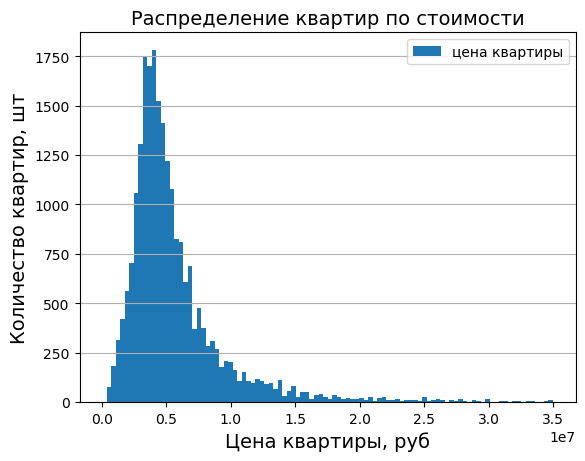

In [96]:
data.plot(kind='hist', y='last_price', bins=100, label='цена квартиры', legend=True)
plt.grid(axis='y')
plt.title('Распределение квартир по стоимости', fontsize=14)
plt.xlabel('Цена квартиры, руб', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

#### Цена за квадратный метр

Построим распределение квартир по цене за квадратный метр.

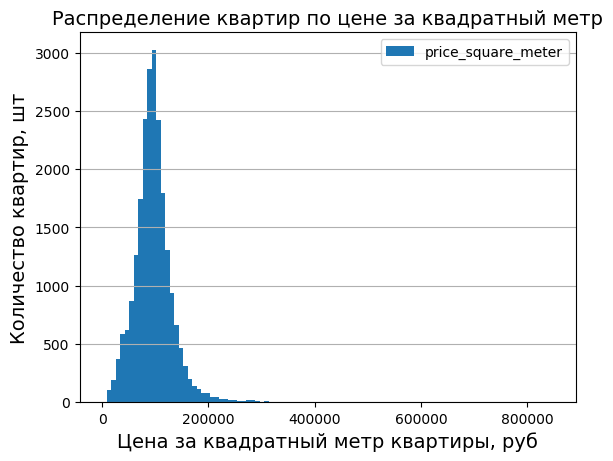

In [97]:
data.plot(kind='hist', y='price_square_meter', bins=100)
plt.grid(axis='y')
plt.title('Распределение квартир по цене за квадратный метр', fontsize=14)
plt.xlabel('Цена за квадратный метр квартиры, руб', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

In [98]:
price_square_meter_discr = data['price_square_meter'].describe()
display(price_square_meter_discr)

count     22809.000000
mean      96526.701171
std       36505.683785
min         111.000000
25%       76315.000000
50%       94551.000000
75%      113181.000000
max      848484.000000
Name: price_square_meter, dtype: float64

In [99]:
price_square_meter_outlier = outlier(price_square_meter_discr)
print(price_square_meter_outlier)

168480.0


Из гистограммы было видно, что квартир более 300 000 кв м, практически нет.

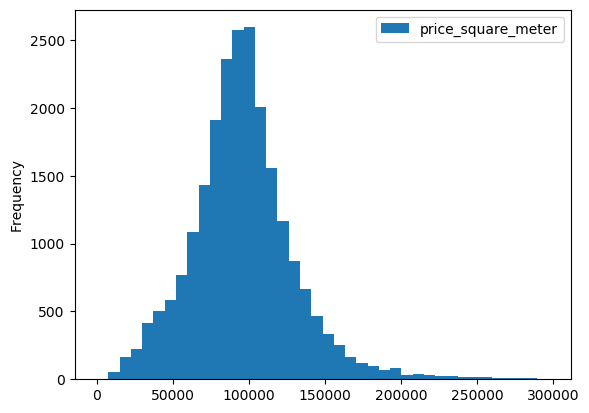

In [100]:
data[data['price_square_meter'] < 300000].plot(kind='hist', y='price_square_meter', bins=40)

Получилось гауссово распределение.

In [101]:
print(
    'Доля значений цены за квадратный метр больше 300 000 р составляет',
    round(100*(data.query('price_square_meter > 300000')['price_square_meter'].count() / len(data)), 1),
    '%'
)

Доля значений цены за квадратный метр больше 300 000 р составляет 0.2 %


Удалим из данных строки с price_square_meter > 300 000

In [102]:
len(data)

22809

In [103]:
data = data.query('price_square_meter < 300000')

In [104]:
len(data)

22773

#### Столбец ceiling_height высота потолков

Построим распределение квартир по высоте потолков.

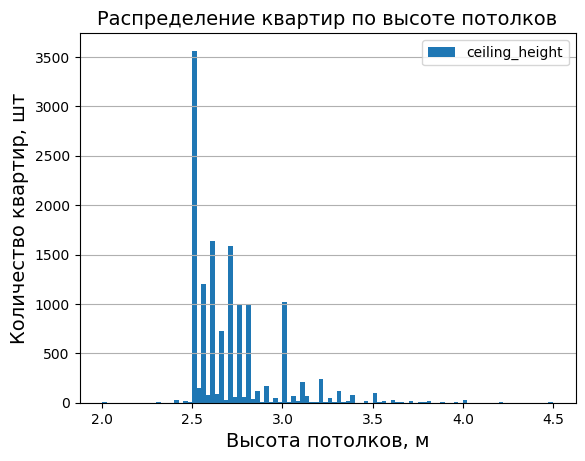

In [105]:
data.plot(kind='hist', y='ceiling_height', bins=100)
plt.grid(axis='y')
plt.title('Распределение квартир по высоте потолков', fontsize=14)
plt.xlabel('Высота потолков, м', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

В значениях высоты потолков присутствуют очень большие значения 100, а основные значения не превышают 10 м, поэтому гистограмма отображается нудобно. Найдём большие значения высоты потолков построив таблицу с количеством уникальных значений, отсортированную по высоте потолков и посмотрим последние 25 строк.

In [106]:
data['ceiling_height'].value_counts().reset_index().sort_values(by='index').tail(40)

,index,ceiling_height
14,3.50,99
104,3.52,3
106,3.53,2
79,3.54,5
58,3.55,10
99,3.56,3
142,3.57,1
137,3.59,1
33,3.60,30
108,3.62,2


Значения высоты потолков более 4,5 метров встречаются очень редко. А потолки более 5 метров скорее всего, какая-то ошибка. По вопросу возможной высоты потолков лучше обратиться к специалистам риэлторам. Для нашего исследования возъмём границу отсечения 4,5 метров.

Посмотрим минимальные значения высоты потолков.

In [107]:
data['ceiling_height'].value_counts().reset_index().sort_values(by='index').head(10)

,index,ceiling_height
54,2.00,11
127,2.20,1
121,2.25,1
88,2.30,4
134,2.34,1
36,2.40,23
45,2.45,14
110,2.46,2
100,2.47,3
64,2.48,8


Значения высоты потолков менее 2 метров нереальные значения.

Построим гистограмму с высотой потолков от 2 до 5 м.

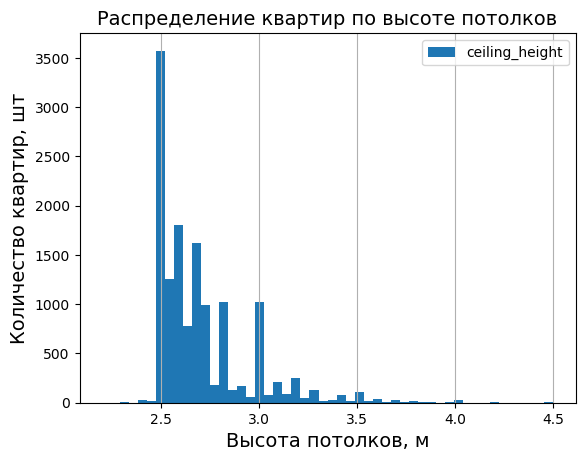

In [108]:
data.query('2 < ceiling_height < 5').plot(kind='hist', y='ceiling_height', bins=50, grid=True)
plt.grid(axis='y')
plt.title('Распределение квартир по высоте потолков', fontsize=14)
plt.xlabel('Высота потолков, м', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Из гистограммы видно, что в основном квартитры имеют высоту потолков от 2,5 до 3,5 метров.

Удалим квартиры с высотой потолков менее 2 метров и более 4,5 м

In [109]:
len(data)

22773

In [110]:
data = data.query('ceiling_height > 2 or ceiling_height.isna()')

In [111]:
len(data)

22762

In [112]:
data = data.query('ceiling_height <= 4.5 or ceiling_height.isna()')

In [113]:
len(data)

22762

#### Столбец days_exposition длительность продажи квартир

Построим распределение длительности продажи квартир.

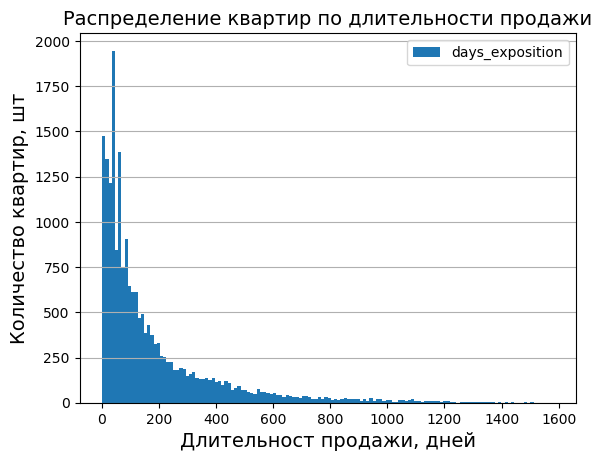

In [114]:
data.plot(kind='hist', y='days_exposition', bins=140)
plt.grid(axis='y')
plt.title('Распределение квартир по длительности продажи', fontsize=14)
plt.xlabel('Длительност продажи, дней', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

In [115]:
days_exposition_descr = data['days_exposition'].describe()
display(days_exposition_descr)

count    20103.000000
mean       179.067851
std        218.086824
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

Посчитаем значение Q3+1.5IQR

In [116]:
days_exposition_outlier = outlier(days_exposition_descr)
print(days_exposition_outlier)

502.5


Значение Q3+1.5IQR получилось равно 503. Возьмём эту величину в качестве границы отсечения выбивающихся значений и посчитаем их долю. 

In [117]:
print(data.query('days_exposition > @days_exposition_outlier')['days_exposition'].count() / len(data))

0.07332396098761093


Доля таких значений оказалась 7,3%, что представляет значительное количество. Рассмотрим в качестве разумной границы 3 года 1095 дней и посчитаем долю отброшенных значений.

In [118]:
print(data.query('days_exposition > 1095')['days_exposition'].count() / len(data))

0.0070731921623758895


Доля таких значений составляет 0.7% ее и примем в качестве границы для отсечения редких значений.

Построим гистограмму с границей в 1095 дней.

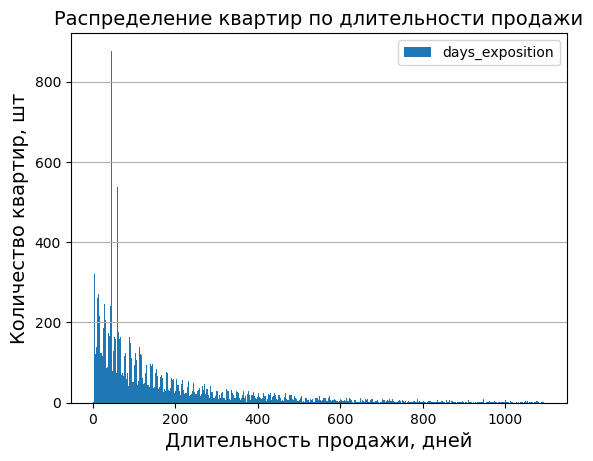

In [119]:
data[data['days_exposition'] < 1095].plot(kind='hist', y='days_exposition', bins=730)
plt.grid(axis='y')
plt.title('Распределение квартир по длительности продажи', fontsize=14)
plt.xlabel('Длительность продажи, дней', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

In [120]:
data[data['days_exposition'] < 1095]['days_exposition'].describe()

count    19938.000000
mean       170.287140
std        196.087397
min          1.000000
25%         44.000000
50%         93.000000
75%        222.000000
max       1094.000000
Name: days_exposition, dtype: float64

Медиана равна 93 дням, за это время продaётся 50% квартир. Будем считать это значение обычным временем продажи. 25% квартир продаётся за 44 дня, это значение примем за быстрые продажи. 75% квартир продаётся за 222 дня, значение длительности больше этой величины будем считать долгой продажей.

На гистограмме распределения по длительности продажи квартир есть выбросы в области до 100 дней.  Построим гистограмму от 0 до 100 дней.

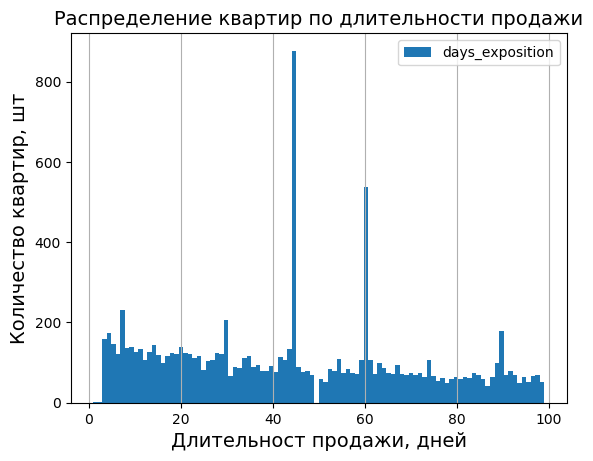

In [121]:
data.query('days_exposition < 100').plot(kind='hist', y='days_exposition', bins=100, grid=True)
plt.grid(axis='y')
plt.title('Распределение квартир по длительности продажи', fontsize=14)
plt.xlabel('Длительност продажи, дней', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

На гистограмме видны выбросы в значении близком к 10, к 30, 45, 60, 75 и 95 дням. Для точного определения значений выбросов посмотрим их значения построив таблицу количества уникальных значений days_exposition с сортировкой.

In [122]:
days_exposition_100 = (
    data.query('days_exposition < 100')['days_exposition']
    .value_counts().reset_index().sort_values(by='index')
)
days_exposition_100 = days_exposition_100.rename(columns={'index' : 'days_exposition', 'days_exposition' : 'count'})
days_exposition_100['days_exposition'] = days_exposition_100['days_exposition'].astype(int)
display(days_exposition_100.head(20))

,days_exposition,count
98,1,1
97,2,2
6,3,158
5,4,173
7,5,147
20,6,122
2,7,232
11,8,136
9,9,138
14,10,127


На основе этой таблицы построим гистограмму, где по оси x будут days_axposition, а по оси Y count. Ограничим значения по оси Y 200, чтобы лучше увидеть границу выбросов.

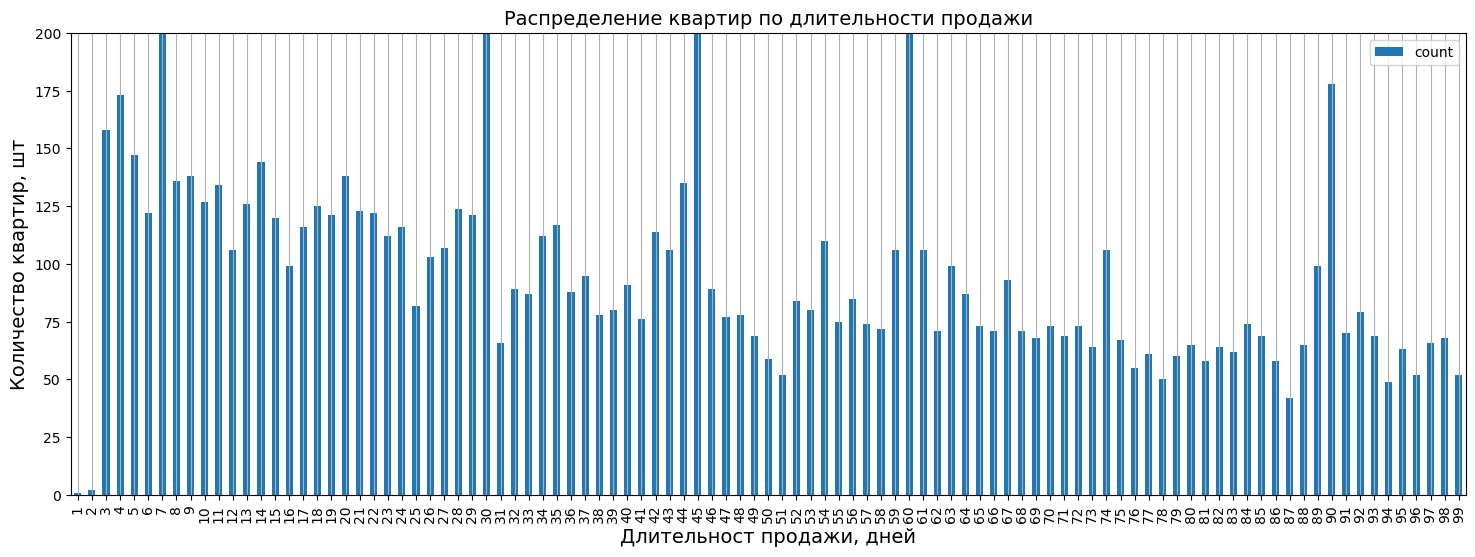

In [123]:
days_exposition_100.plot(kind="bar", x='days_exposition', y='count', grid=True, ylim=(0, 200), figsize=(18,6))
plt.grid(axis='y')
plt.title('Распределение квартир по длительности продажи', fontsize=14)
plt.xlabel('Длительност продажи, дней', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Из построенный гистограммы видно, что выбросы имеют значения больше 180. Есть еще кратный 7 выброс на значении 14 дней, но не однозначный. Включим его в отчёт, для дальнейшего обсуждения с отделом по работе сервиса. Из полученной таблицы отберем значения count более 180.

In [124]:
days_exposition_100.query('count > 180')  

,days_exposition,count
2,7,232
3,30,205
0,45,877
1,60,537


Из полученной таблицы получили, что выбросы происходят для значений days_exposition 7, 14, 30, 45, 60, 90 дней. Можно предположить, что данные выбросы связаны с работой сервиса. Скорее всего это сроки оплаты за показ объявления о продаже. Если оплата не поступает сервис заканчивает показ объявления, поэтому возникает выброс. Этот вопрос нужно обсуждать с отделом по работе сервиса.

В заключение удалим строки с редкими выбивающимися значениями, т.е. удалим строки больше 1095 дней, при этом сохраним строки с пустыми значениями.

In [125]:
len(data)

22762

In [126]:
data = data.query('days_exposition <= 1095 or days_exposition.isna()')

In [127]:
len(data)

22601

#### Выводы

1) В данном разделе было проведено обследование 6 столбцов данных для определения редких и выбивающихся значений.

In [128]:
print(
    'Всего по 6 столбцам было удалено', data_len_4 - len(data), 'таких строк, что составило',
    round(100*(data_len_4 - len(data)) / data_len_4, 1), '%'
)

Всего по 6 столбцам было удалено 580 таких строк, что составило 2.5 %


2) В столбце days_exposition были обнаружены выбросы в значениях 7, 14, 30, 45, 60, 90 дней, которые возможно связаны с работой сервиса. Разбираться в причинах этих выбросов нужно совместно с отделом по работе сервиса. 

3. Расчёт общего количества удаленных строк.

In [129]:
print('Всего было удалено', data_len - len(data), ',что составило', round(100*(data_len - len(data)) / data_len, 1), '%')

Всего было удалено 1098 ,что составило 4.6 %


### Зависимость цен квартир от различных параметров

#### Цена от площади

Для определения зависимости цены квартиры от площади построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона.

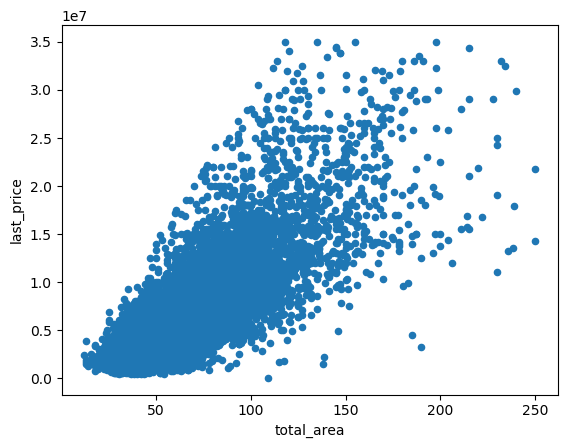

In [130]:
data.plot(x='total_area', y='last_price', kind='scatter')

In [131]:
print(data['total_area'].corr(data['last_price']))

0.7879672360205273


Из диаграммы рассеяния и коэффициента корреляции равного 0,78 видно, что есть зависимость стоимости квартиры от площади. Чем больше площадь, тем больше стоимость.

#### Цена от количества комнат

Для определения зависимости стоимости квартиры от площади, построим столбцовую диаграмму количество комнат - средняя стоимость квартиры

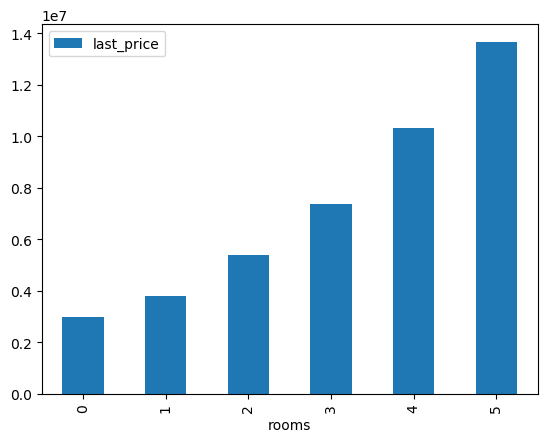

In [132]:
rooms_mean_price = data.pivot_table(index='rooms', values='last_price').reset_index().sort_values(by='rooms')
rooms_mean_price.plot(x='rooms', y='last_price', kind='bar')

Из диаграммы видно, что чем больше комнат, тем больше стоимость квартиры.

#### Цена от этажа первый, последний, другой 

Построим сводную таблицу категория этажа - средняя стоимость квартиры.

In [133]:
data.pivot_table(index='floor_category', values='last_price', aggfunc=['median', 'mean']).sort_values(by=('mean', 'last_price'))

,median,mean
,last_price,last_price
floor_category,,
первый,3880000.0,4.386225e+06
последний,4246500.0,5.377051e+06
другой,4750000.0,5.851200e+06


In [134]:
38 / 46.5

0.8172043010752689

Из полученной таблицы видно, что есть зависимость стоимости квартиры от этажа, дешевле всех стоят квартиры на 1-м этаже, чуть дороже квартиры на последнем этаже, и дороже всех квартиры между первым и последним этажём.

#### Цена от удаленности от центра

Для определения зависимости цены от удаленности от центра, построим сводную таблицу city_centers_nearest_km - mean last_price. На основе этой таблицы построим столбчатую диаграмму и график удаленность от центра - средняя цена. 

In [135]:
city_centers_price = data.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').reset_index()
city_centers_price['city_centers_nearest_km'] = city_centers_price['city_centers_nearest_km'].astype(int)
display(city_centers_price.head())

,city_centers_nearest_km,last_price
0,0,1.372818e+07
1,1,1.120503e+07
2,2,1.072054e+07
3,3,9.244978e+06
4,4,1.003208e+07


Построение графика расстояние от центра - средняя цена квартиры 

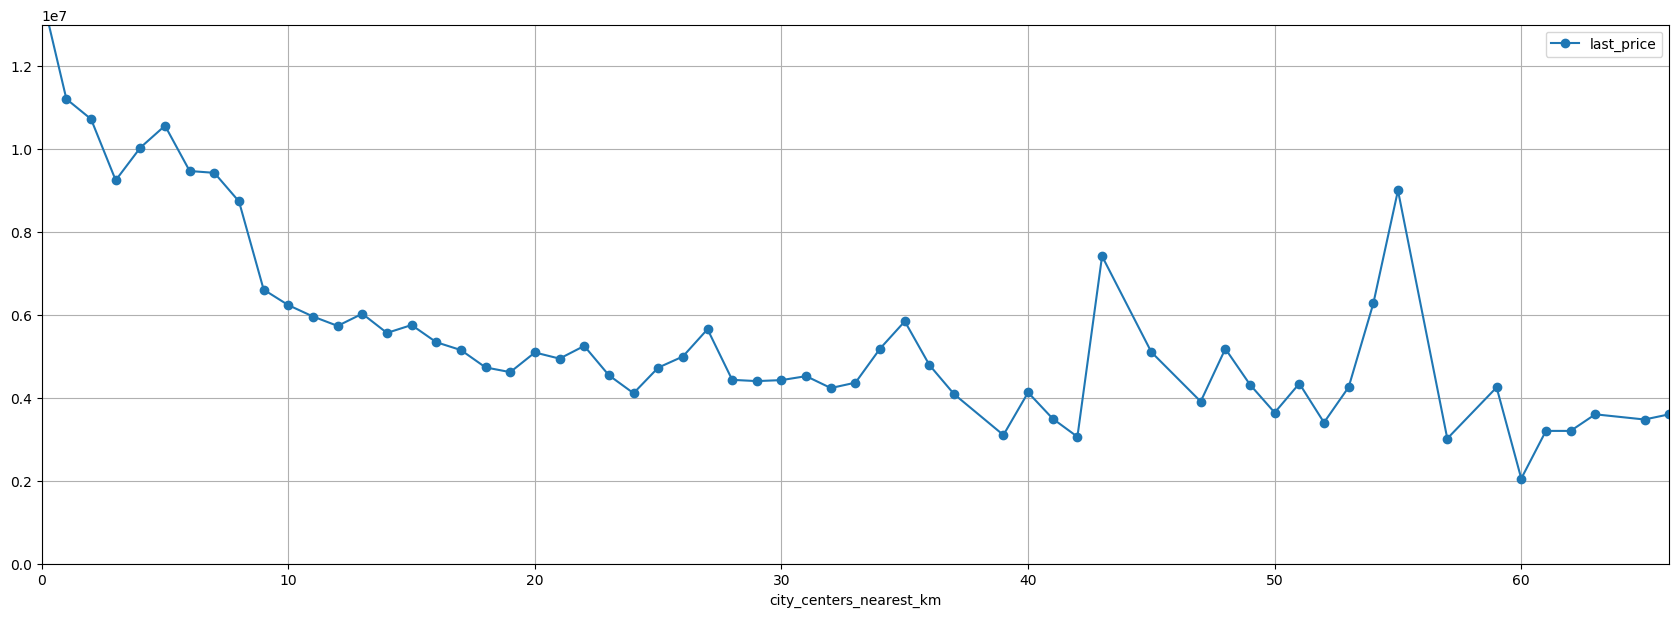

In [136]:
(
    city_centers_price
    .plot(x='city_centers_nearest_km', y='last_price', style='o-',  ylim=(0,13000000),figsize=(21,7), grid=True)
)

Из графика видно, что средняя стоимость квартир очень сильно меняется в зависимости от расстояния от центра.
От 13 млн руб в центре, до 2 млн руб в пригородном населенном пункте с самым дешёвым жильём. Квартиры в центре Санкт-Петербурга в среднем в 3 раза дороже, чем жильё на окраинах и в пригородах.

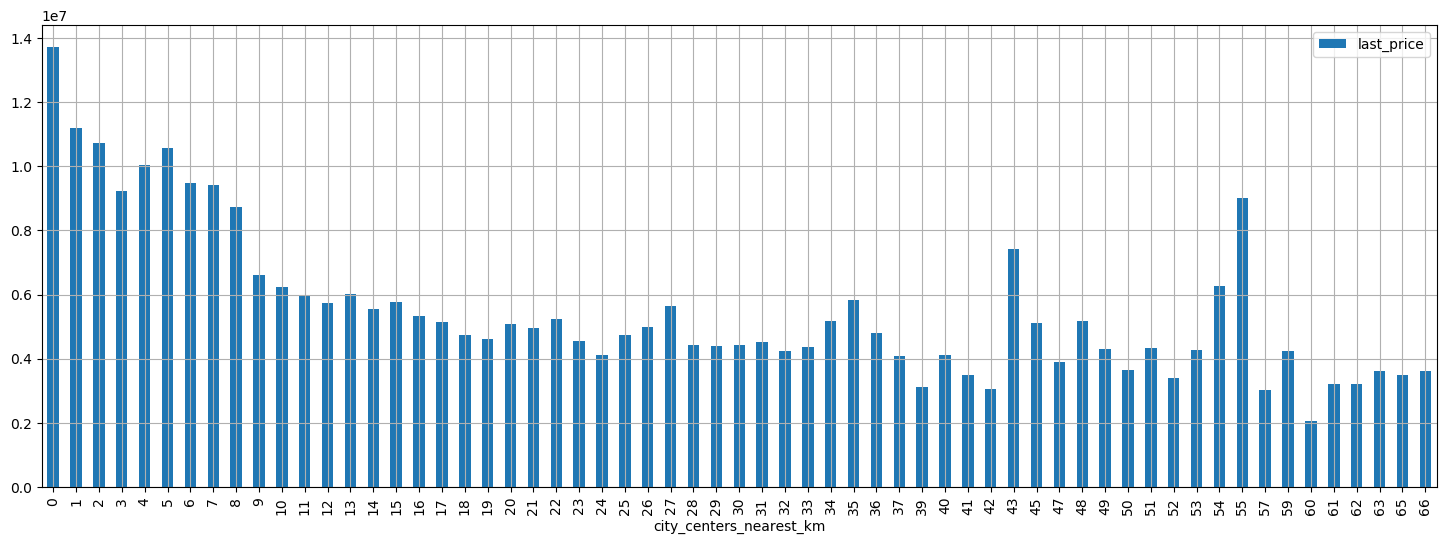

In [137]:
# Столбчатая диаграмма расстояние от центра - средняя цена
city_centers_price.plot(x='city_centers_nearest_km', y='last_price', kind='bar', figsize=(18,6), grid=True)

Дополнительно еще построим график расстояние от центра - средняя цена

На полученной гистограмме и графике видно, что чем дальше от центра тем, квартиры дешевле, но при этом есть повышения цены на некоторых расстояниях. Первое повышение цены находится на расстоянии 5 км от центра, другие повышения цены находятся дальше 20 км. На этих расстояниях скорее всего находятся населенные пункты в пригородах. Определим на каких расстояних есть повышение цены, для этого сделаем срез city_centers_nearest_km > 20 и last_price > 5,5 млн руб. 

In [138]:
display(city_centers_price.query('last_price > 5500000 and city_centers_nearest_km > 20'))

,city_centers_nearest_km,last_price
27,27,5.652794e+06
35,35,5.843168e+06
42,43,7.414354e+06
51,54,6.273150e+06
52,55,9.000000e+06


#### Цена от дня недели

In [139]:
data.pivot_table(index='day_of_week', values='last_price', aggfunc=['median', 'mean'])

,median,mean
,last_price,last_price
day_of_week,,
0,4580500.0,5.637134e+06
1,4650000.0,5.599448e+06
2,4600000.0,5.680941e+06
3,4550000.0,5.681322e+06
4,4500000.0,5.576935e+06
5,4500000.0,5.423738e+06
6,4500000.0,5.446218e+06


Цена квартиры от дня недели первого отображения объявления не зависит.

#### Цена от месяца

Построение диаграммы средняя цена квартир в зависимости от месяца размещения объявления.

In [140]:
month_price = data.pivot_table(index='month', values='last_price', aggfunc=['median', 'mean'])
display(month_price)

,median,mean
,last_price,last_price
month,,
1,4500000.0,5.676672e+06
2,4600000.0,5.655511e+06
3,4583000.0,5.583080e+06
4,4750000.0,5.701467e+06
5,4500000.0,5.673810e+06
6,4350000.0,5.413464e+06
7,4525000.0,5.549122e+06
8,4500000.0,5.500198e+06


In [141]:
(45-43) / 45

0.044444444444444446

Цена в июле отличается от цены в ноябре на 4,4%.

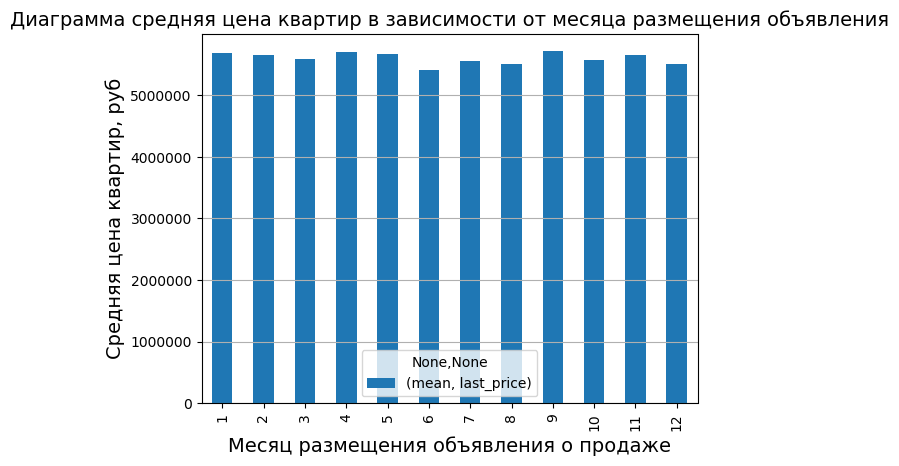

In [142]:
month_price.plot(y=('mean', 'last_price'), kind='bar')
plt.grid(axis='y')
plt.title('Диаграмма средняя цена квартир в зависимости от месяца размещения объявления', fontsize=14)
plt.xlabel('Месяц размещения объявления о продаже', fontsize=14)
plt.ylabel('Средняя цена квартир, руб', fontsize=14);

Зависимости средней цены квартиры от месяца 1-го отображения объявления практически нет.

#### Цена от года

In [143]:
year_price = data.pivot_table(index='year', values='last_price', aggfunc=['median', 'mean'])
display(year_price)

,median,mean
,last_price,last_price
year,,
2014,6295000.0,8.187598e+06
2015,5000000.0,6.098725e+06
2016,4450000.0,5.662107e+06
2017,4410000.0,5.491698e+06
2018,4500000.0,5.484305e+06
2019,5000000.0,5.978358e+06


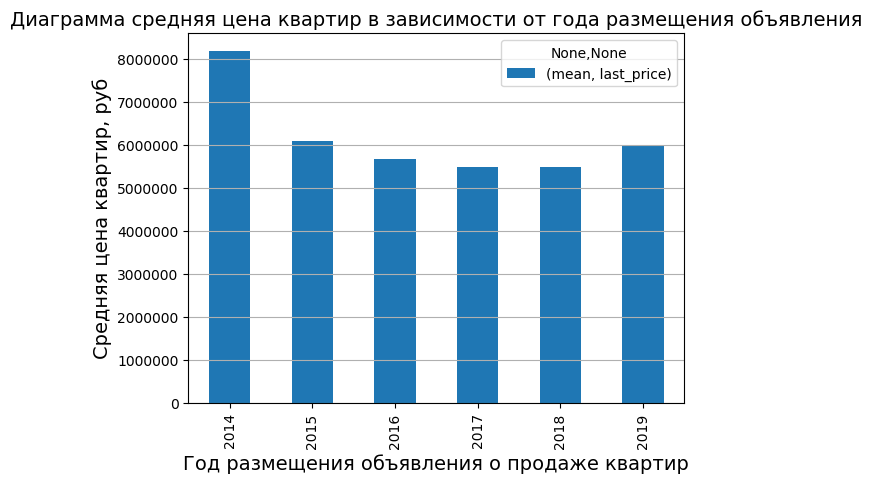

In [144]:
year_price.plot(y=('mean', 'last_price'), kind='bar')
plt.grid(axis='y')
plt.title('Диаграмма средняя цена квартир в зависимости от года размещения объявления', fontsize=14)
plt.xlabel('Год размещения объявления о продаже квартир', fontsize=14)
plt.ylabel('Средняя цена квартир, руб', fontsize=14);

На диаграмме видно, что в 2014 году средняя цена была, больше остальных годов, но это не очень надёжно, т.к. в 2014 году было еще очень мало объявлений. В остальные года, стоимость отличалась незначительно, кроме 2015 г и 2019 г, в котором цена была на 10% больше цены в 2016-18 году.

#### Цена квадратного метра жилья от населённого пункта

10 населенных пунктов с наибольшим числом объявлений и со стоимостью за квадратный метр

In [145]:
locality_square_meter = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'mean'])
locality_square_meter10 = locality_square_meter.sort_values(by=('count', 'price_square_meter'), ascending=False).head(10)
display(locality_square_meter10)

,count,mean
,price_square_meter,price_square_meter
locality_name,,
Санкт-Петербург,14887,110080.481225
посёлок Мурино,518,85787.059846
посёлок Шушары,438,78592.527397
Всеволожск,382,67141.534031
Пушкин,346,103055.887283
Колпино,334,75316.359281
посёлок Парголово,324,90261.441358
Гатчина,300,68768.966667


Населённый пункт с самой высокой стоимостью за квадратный метр

In [146]:
print(locality_square_meter10[locality_square_meter10[('mean', 'price_square_meter')] == locality_square_meter10[('mean', 'price_square_meter')].max()])

                             count               mean
                price_square_meter price_square_meter
locality_name                                        
Санкт-Петербург              14887      110080.481225


Населённый пункт с самой низкой стоимостью за квадратный метр

In [147]:
print(locality_square_meter10[locality_square_meter10[('mean', 'price_square_meter')] == locality_square_meter10[('mean', 'price_square_meter')].min()])

                           count               mean
              price_square_meter price_square_meter
locality_name                                      
Выборг                       234       58198.209402


In [148]:
110669 / 58198

1.9015945565139696

Из проведенного сравнения средней цены за кв м жилья было определено, что самая высокая стоимость в Санкт-Петербурге и составляет 110700 р за кв м, самая низкая цена в Выборге 58198 р кв м. Стоимость кв м жилья в Санкт-Петербурге в 1,9 раза больше, чем в Выборге

#### Выводы

Из проведенного исследования зависимостей цены квартиры от различных параметров было выявлено, что цена квартиры сильно зависит от площади квартиры, от количества комнат, от удалённости от центра Санкт-Петербурга. Максимальное и минимальное значение для этих столбцов отличаются в несколько раз. В меньшей степени  цена квартиры зависит от этажа, разница между первым этажём и любым другим этажем, не первым и последним, составляет 20%. Еще в меньшей степени цена квартир зависит от года, разница между максимальным и минимальным значением составляет 10%. Цена квартиры практически не зависит месяца, разница между июлем и ноябрём составляет всего 5%. Цена квартиры совсем не зависит от дня недели.
Было выячнено, что что самая высокая стоимость за кв м жилья в Санкт-Петербурге и составляет 110700 р за кв м, самая низкая стоимость в Выборге 58198 р кв м.

### Квартиры в центре Санкт-Петербурга

#### Предисловие

В данном разделе, будем одновременно просматривать значения данных по столбцам для квартир в центре Санкт-Петербурга и в общей базе всех квартир, проводя их сравнение. Сначал выделим квартиры в центре Санкт-Петербурга. 

#### Выделение квартир в центре Санкт-Петербурга

Создадим отдельный датафрейм для Санкт-Петербурга.

In [149]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
print('Всего объявлений в Санкт-Петербурге', len(data_spb))
print('Пустых значений в столбце city_centers_nearest', data_spb['city_centers_nearest'].isna().sum())

Всего объявлений в Санкт-Петербурге 14887
Пустых значений в столбце city_centers_nearest 49


Пустых значений мало, поэтому удалим их.

In [150]:
# удаление строк с пустыми значения в city_centers_nearest 
data_spb = data_spb.dropna(subset=['city_centers_nearest'])
len(data_spb)

14838

Вычисление расстояния в км на основе столцба city_centers_nearest и сохранение в том же столбце. 

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Так было сделано до создания столбца city_centers_nearest_km, поэтому ниже вычисления со столбцом city_centers_nearest.
</div>

In [151]:
data_spb['city_centers_nearest'] = (round(data_spb['city_centers_nearest'] / 1000)).astype(int)
display(data_spb[['locality_name', 'city_centers_nearest']].head())

,locality_name,city_centers_nearest
0,Санкт-Петербург,16
2,Санкт-Петербург,14
4,Санкт-Петербург,8
7,Санкт-Петербург,12
9,Санкт-Петербург,15


Создадим таблицу расстояние от центра - средняя стоимость квартир.

In [152]:
city_centers_nearest_price = data_spb.pivot_table(index='city_centers_nearest', values='last_price').reset_index()
display(city_centers_nearest_price.head())

,city_centers_nearest,last_price
0,0,1.372818e+07
1,1,1.120503e+07
2,2,1.072054e+07
3,3,9.244978e+06
4,4,1.003208e+07


Построим график средняя стоимость квартиры - расстояние от центра.

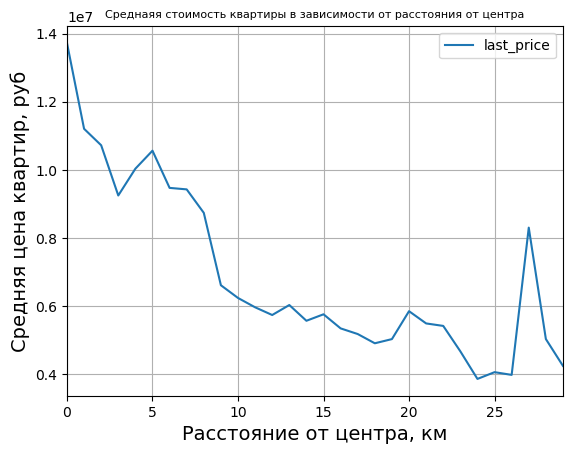

In [153]:
city_centers_nearest_price.plot(x='city_centers_nearest', y='last_price', grid=True)
plt.title('Среднаяя стоимость квартиры в зависимости от расстояния от центра', fontsize=8)
plt.xlabel('Расстояние от центра, км', fontsize=14)
plt.ylabel('Средняя цена квартир, руб', fontsize=14);

Чтобы точнее определить центр отобразим график с расстоянием от центра до 15 км.

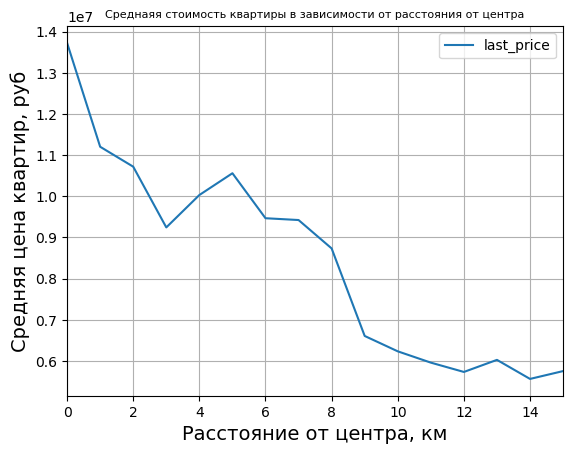

In [154]:
city_centers_nearest_price.query('city_centers_nearest <= 15')\
    .plot(x='city_centers_nearest', y='last_price', grid=True)
plt.title('Среднаяя стоимость квартиры в зависимости от расстояния от центра', fontsize=8)
plt.xlabel('Расстояние от центра, км', fontsize=14)
plt.ylabel('Средняя цена квартир, руб', fontsize=14);

На графике в районе 8 км есть излом цены, где она резко начинает падать. Возъмем это значение в качестве отсечения центра города.

In [155]:
# Создание датафрейма квартир в центре.
data_spb_center = data_spb.query('city_centers_nearest <= 8')
# Расчет доли квартир в центре по отношению к квартирам
len(data_spb_center) / len(data.query('locality_name == "Санкт-Петербург"'))

0.23832874319876401

Количество квартир в центре составляет 19,4% от общего количества.

#### Столбец total_area площадь

Построим распределения квартир по площади по всем квартирам и по квартирам в центре Санкт-Петербурга на одном графике.

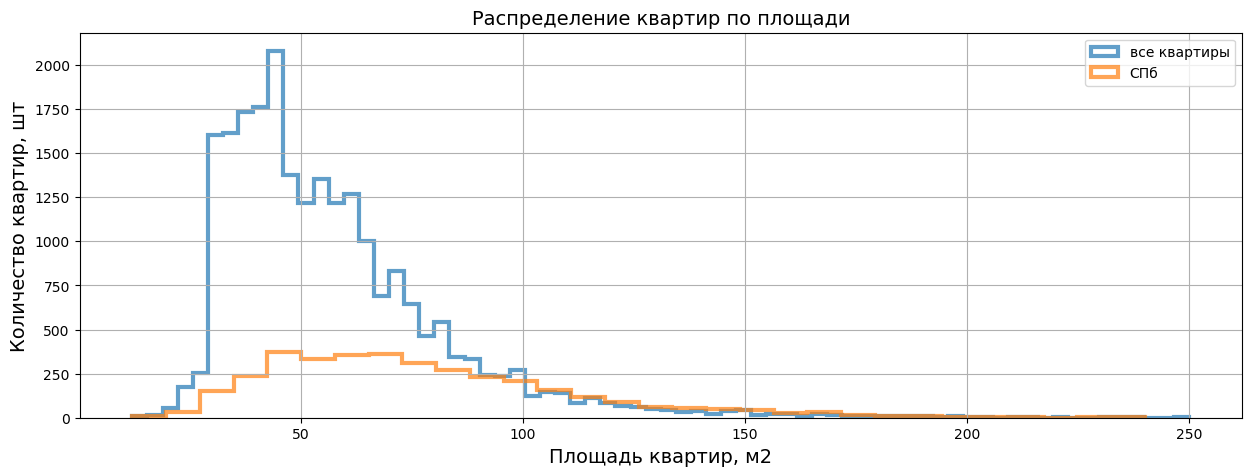

In [156]:
ax_area = data.plot(
    kind='hist', 
    y='total_area',
    histtype='step',
    linewidth=3,
    alpha=0.7,
    bins=70, 
    label='все квартиры', 
    legend=True)
data_spb_center.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    linewidth=3,
    alpha=0.7,
    bins=30,
    label='СПб',
    legend=True,
    ax=ax_area,
    figsize=(15,5),
    grid=True
)
plt.title('Распределение квартир по площади', fontsize=14)
plt.xlabel('Площадь квартир, м2', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

На полученной диаграмме видно, что в центре Санкт-Петербурга, меньше квартир с маленькой площадью в основном представлены квартиры с площадью от 40 кв м до 100 кв м, в то время как для всех квартир, основная площадь от 30 до 60 кв м. Из сравнения гистограмм видно, что квартиры с большой площадью, больше 100 кв м практически все находятся в центре.

#### Столбец last_price цена

Построим 2 гистограммы по цене для всех квартир и для квартир в центре Санкт-Петербурга.

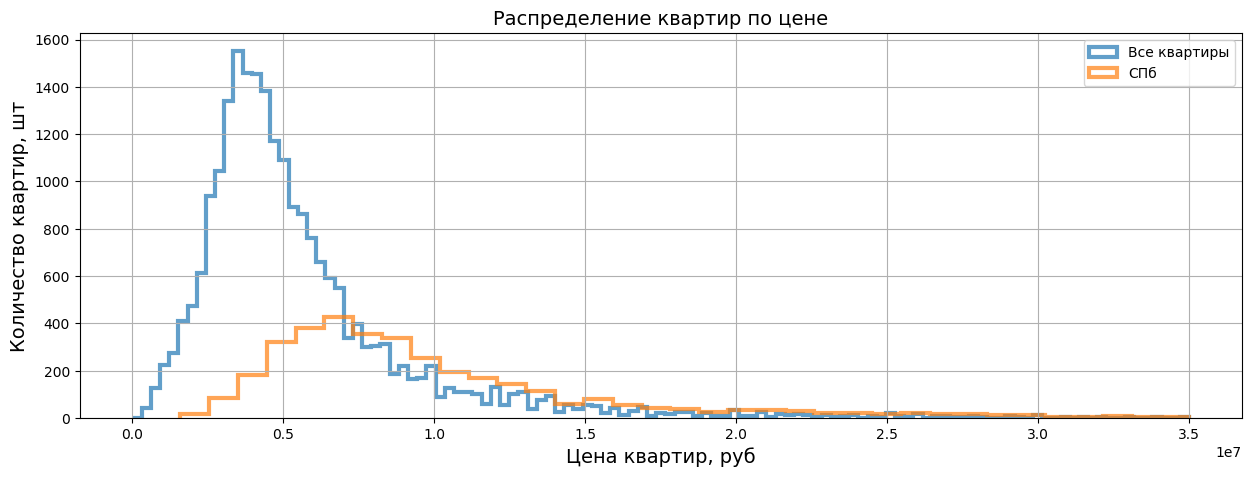

In [157]:
ax_price = data.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    linewidth=3,
    alpha=0.7,
    bins=115,
    label='Все квартиры',
    legend=True
)
data_spb_center.plot(
    kind='hist', 
    y='last_price', 
    histtype='step',
    linewidth=3,
    alpha=0.7,
    bins=35, 
    label='СПб', 
    legend=True, 
    ax=ax_price,
    figsize=(15,5),
    grid=True,
)
plt.title('Распределение квартир по цене', fontsize=14)
plt.xlabel('Цена квартир, руб', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Построим таблицу сравнения статистических характеристик для всех квартир и для квартир в центре Санкт-Петербурга. Расчитаем столбец отношения этих статистических характеристик.

In [158]:
all_spb_descr = data['last_price'].describe().to_frame().join(
    data_spb_center['last_price'].describe().to_frame(), lsuffix='_all', rsuffix='_Center_SPb')
all_spb_descr['ratio_spb/all'] = all_spb_descr['last_price_Center_SPb'] / all_spb_descr['last_price_all']
display(all_spb_descr)

,last_price_all,last_price_Center_SPb,ratio_spb/all
count,2.260100e+04,3.548000e+03,0.156984
mean,5.604194e+06,9.847442e+06,1.757156
std,3.874905e+06,5.622893e+06,1.451105
min,1.219000e+04,1.600000e+06,131.255127
25%,3.400000e+06,6.100000e+06,1.794118
50%,4.550000e+06,8.300000e+06,1.824176
75%,6.500000e+06,1.189580e+07,1.830123
max,3.500000e+07,3.500000e+07,1.000000


Из сравнения статистических характеристик видно, что среднее значение цены для центра Санкт-Петербурга в 1,8 раза больше, чем для всех квартир. Из сравнения гистограмм можно заметить, что квартиры более 70 млн руб практически все находятся в центре.

#### Столбец rooms число комнат

Построим гистограммы распределения по числу комнат для всех квартир и для квартир в центре Санкт-Петербурга.

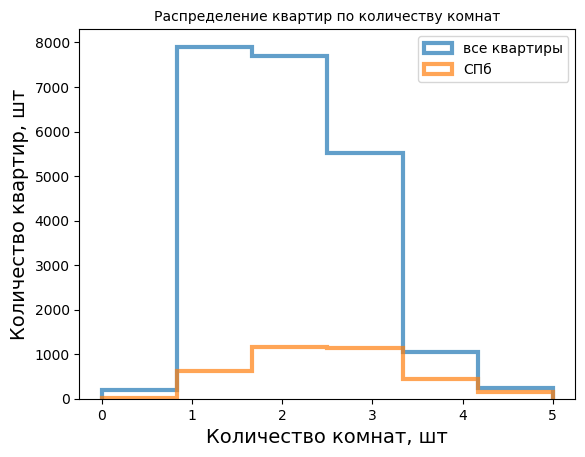

In [159]:
ax_rooms = data.plot(
    kind='hist', 
    y='rooms', 
    histtype='step',
    linewidth=3,
    alpha=0.7,
    bins=6, 
    label='все квартиры',
    legend=True
)
data_spb_center.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    linewidth=3,
    alpha=0.7,
    bins=6,
    label='СПб',
    legend=True,
    ax=ax_rooms
)
plt.title('Распределение квартир по количеству комнат', fontsize=10)
plt.xlabel('Количество комнат, шт', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Из сравнения этих гистограмм видно, что для всех квартир 1-комнатных и 2-х комнатных почти одинаковое количество, а 3 комнатных меньше, в то время как, для центра Санкт-Петербурга 2, 3-комнатных почти одинаковое количестве, и их больше, чем 1-комнатных. Ещё можно заметить, что 5-комнатные квартиры в основном находятся в центре Санкт-Петербурга.

#### Столбец ceiling_height

Построим гистограммы распределения по высоте, для всех квартир и для квартир в центре Санкт-Петербурга.

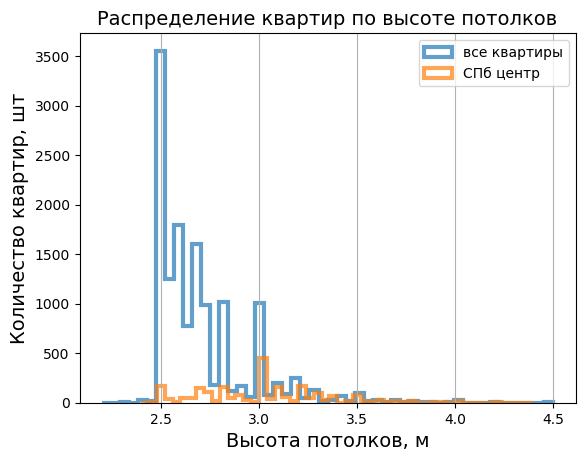

In [160]:
ax_ceiling_height = data.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    linewidth=3,
    alpha=0.7,
    bins=50,
    label='все квартиры',
    legend=True,
)
data_spb_center.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    linewidth=3,
    alpha=0.7,
    bins=50,
    label='СПб центр',
    legend=True,
    grid=True,
    ax=ax_ceiling_height
)
plt.grid(axis='y')
plt.title('Распределение квартир по высоте потолков', fontsize=14)
plt.xlabel('Высота потолков, м', fontsize=14)
plt.ylabel('Количество квартир, шт', fontsize=14);

Из сравнения гистограмм видно, что для всех квартир высота потолков в основном от 2,5 до 3 м, в то время, как в центре СПб основная высота потолков 3 м. Также можно заметить, что квартиры с высотой потолков более 3 м почти все находятся в центра Санкт-Петербурга.

#### Вывод

В данном разделе была выявлена граница центра города равная расстоянию в 8 км от центра.
Также было проведено обследование параметров в 4-х столбцах total_area, last_price, rooms, ceiling_height и их сравнение с такими же параметрами для всех квартир.
Выявлено, что общая площадь квартир в центре в среднем больше, чем для всех квартир. Самые большие значения площадей находятся в центре города.
Цена квартир в центре, также в среднем больше, чем для всех квартир. Самые большие значения стоимости квартир находятся в основном в центре.

## Общий вывод

1) В предобработке данных было выявлено, что большое количество пустых значений в столбце days_exposition находится в 2-х последних годах 2018, 2019. Было предположено, что это связано либо с работой сервиса, либо с выгрузкой данных и требует обсуждения с отделом ответственным за роботу сервиса.

2) В процессе поиска выбросов и редких значений были выявлены выбросы значений в столбце days_exposition в значениях 7, 14, 30, 45, 60, 90 дней, которые возможно связаны с работой сервиса. Разбираться в причинах этих выбросов нужно совместно с отделом по работе сервиса.

3) При исследовании зависимости стоимости квартир от различных параметров было выявлено, что цена квартиры сильно зависит от площади квартиры, от количества комнат, от удалённости от центра города, от этажа первый, последний или другой. В меньшей степени зависит от года и месяца размещения объявления и не зависит от дня недели объявления.

4) При исследовании зависимости цены кв м жилья по населённым пунктам, в 10 из которых больше всего объявлений, было выяснено, что самая дорогая цена кв м в Санкт-Петербурге (110700 р за кв м), самая низкая в Выборге 58198 р кв м

5) По резкому росту стоимости был выявлен центр города в который входят квартиры расположенные не далее 8 км от центра. Было проведено сравнение распределений по различным параметрам для всех квартир и для квартир находящихся в центре Санкт-Петербурга. Было выявлено, что в центре квартиры больше по площади, дороже по цене, там больше квартир с большим количеством комнат, и количество квартир с высокими потолками больше.

6) Таким образом в качестве параметров для определения рыночной стоимости квартиры необходимо выбирать количество комнат, общая площадь, удалённость от центра и этаж (первый, последний или другой)